In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.4f}'.format
plt.rcParams['figure.figsize']= [12,7]
pd.set_option('display.max_columns',500)
pd.set_option('display.max_colwidth', -1)
sns.set(style = 'darkgrid')
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

# Importing the file

In [2]:
data = pd.read_csv('D:/Machine Learning/Kaggle Project/Life Expectancy (WHO)/Life Expectancy Data.csv')

In [3]:
data.head()

,Country,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,Afghanistan,2015,Developing,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,19.1000,83,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.4790,10.1000
1,Afghanistan,2014,Developing,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,18.6000,86,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.4760,10.0000
2,Afghanistan,2013,Developing,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,18.1000,89,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.4700,9.9000
3,Afghanistan,2012,Developing,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,17.6000,93,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.4630,9.8000
4,Afghanistan,2011,Developing,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,17.2000,97,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.4540,9.5000


In [4]:
data.shape

(2938, 22)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life_expectancy                  2928 non-null   float64
 4   Adult_Mortality                  2928 non-null   float64
 5   infant_deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage_expenditure           2938 non-null   float64
 8   Hepatitis_B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five_deaths                2938 non-null   int64  
 12  Polio               

In [6]:
data.columns

Index(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_Mortality',
       'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B',
       'Measles', 'BMI', 'under-five_deaths', 'Polio', 'Total_expenditure',
       'Diphtheria', 'HIV_AIDS', 'GDP', 'Population', 'thinness_1-19_years',
       'thinness_5-9_years', 'Income_composition_of_resources', 'Schooling'],
      dtype='object')

In [7]:
data.shape

(2938, 22)

In [8]:
data.describe()

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.0000,2928.0000,2928.0000,2938.0000,2744.0000,2938.0000,2385.0000,2938.0000,2904.0000,2938.0000,2919.0000,2712.0000,2919.0000,2938.0000,2490.0000,2286.0000,2904.0000,2904.0000,2771.0000,2775.0000
mean,2007.5187,69.2249,164.7964,30.3039,4.6029,738.2513,80.9405,2419.5922,38.3212,42.0357,82.5502,5.9382,82.3241,1.7421,7483.1585,12753375.1201,4.8397,4.8703,0.6276,11.9928
std,4.6138,9.5239,124.2921,117.9265,4.0524,1987.9149,25.0700,11467.2725,20.0440,160.4455,23.4280,2.4983,23.7169,5.0778,14270.1693,61012096.5084,4.4202,4.5089,0.2109,3.3589
min,2000.0000,36.3000,1.0000,0.0000,0.0100,0.0000,1.0000,0.0000,1.0000,0.0000,3.0000,0.3700,2.0000,0.1000,1.6813,34.0000,0.1000,0.1000,0.0000,0.0000
25%,2004.0000,63.1000,74.0000,0.0000,0.8775,4.6853,77.0000,0.0000,19.3000,0.0000,78.0000,4.2600,78.0000,0.1000,463.9356,195793.2500,1.6000,1.5000,0.4930,10.1000
50%,2008.0000,72.1000,144.0000,3.0000,3.7550,64.9129,92.0000,17.0000,43.5000,4.0000,93.0000,5.7550,93.0000,0.1000,1766.9476,1386542.0000,3.3000,3.3000,0.6770,12.3000
75%,2012.0000,75.7000,228.0000,22.0000,7.7025,441.5341,97.0000,360.2500,56.2000,28.0000,97.0000,7.4925,97.0000,0.8000,5910.8063,7420359.0000,7.2000,7.2000,0.7790,14.3000
max,2015.0000,89.0000,723.0000,1800.0000,17.8700,19479.9116,99.0000,212183.0000,87.3000,2500.0000,99.0000,17.6000,99.0000,50.6000,119172.7418,1293859294.0000,27.7000,28.6000,0.9480,20.7000


In [9]:
data.isnull().sum()

Country                            0  
Year                               0  
Status                             0  
Life_expectancy                    10 
Adult_Mortality                    10 
infant_deaths                      0  
Alcohol                            194
percentage_expenditure             0  
Hepatitis_B                        553
Measles                            0  
BMI                                34 
under-five_deaths                  0  
Polio                              19 
Total_expenditure                  226
Diphtheria                         19 
HIV_AIDS                           0  
GDP                                448
Population                         652
thinness_1-19_years                34 
thinness_5-9_years                 34 
Income_composition_of_resources    167
Schooling                          163
dtype: int64

<AxesSubplot:>

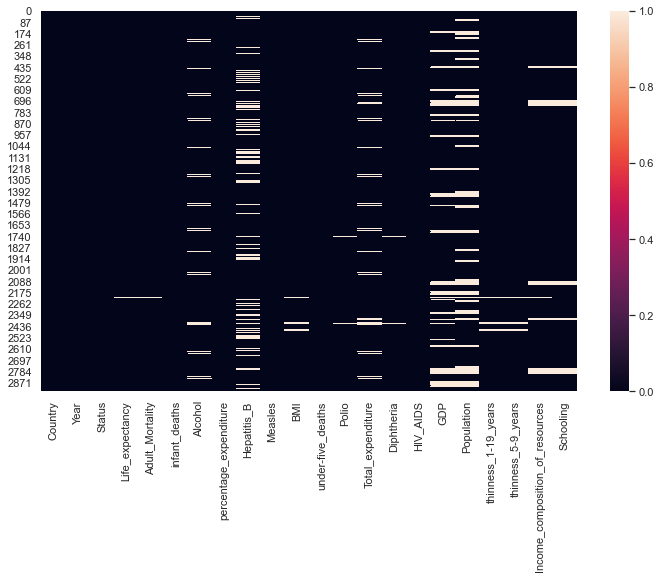

In [10]:
sns.heatmap(data.isnull())

# 

# Segregating numerical and categorical variables

In [11]:
cat_col = data.select_dtypes(include = ['object']).columns
num_col = data.select_dtypes(exclude = ['object']).columns

In [12]:
data_cat = data[cat_col]
data_num = data[num_col]

In [13]:
data_cat

,Country,Status
0,Afghanistan,Developing
1,Afghanistan,Developing
2,Afghanistan,Developing
3,Afghanistan,Developing
4,Afghanistan,Developing
...,...,...
2933,Zimbabwe,Developing
2934,Zimbabwe,Developing
2935,Zimbabwe,Developing
2936,Zimbabwe,Developing


In [14]:
data_num

,Year,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,Hepatitis_B,Measles,BMI,under-five_deaths,Polio,Total_expenditure,Diphtheria,HIV_AIDS,GDP,Population,thinness_1-19_years,thinness_5-9_years,Income_composition_of_resources,Schooling
0,2015,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,19.1000,83,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.4790,10.1000
1,2014,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,18.6000,86,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.4760,10.0000
2,2013,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,18.1000,89,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.4700,9.9000
3,2012,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,17.6000,93,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.4630,9.8000
4,2011,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,17.2000,97,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.4540,9.5000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2004,44.3000,723.0000,27,4.3600,0.0000,68.0000,31,27.1000,42,67.0000,7.1300,65.0000,33.6000,454.3667,12777511.0000,9.4000,9.4000,0.4070,9.2000
2934,2003,44.5000,715.0000,26,4.0600,0.0000,7.0000,998,26.7000,41,7.0000,6.5200,68.0000,36.7000,453.3512,12633897.0000,9.8000,9.9000,0.4180,9.5000
2935,2002,44.8000,73.0000,25,4.4300,0.0000,73.0000,304,26.3000,40,73.0000,6.5300,71.0000,39.8000,57.3483,125525.0000,1.2000,1.3000,0.4270,10.0000
2936,2001,45.3000,686.0000,25,1.7200,0.0000,76.0000,529,25.9000,39,76.0000,6.1600,75.0000,42.1000,548.5873,12366165.0000,1.6000,1.7000,0.4270,9.8000


# 

# Checking For Null values

In [15]:
data_num.isnull().sum()

Year                               0  
Life_expectancy                    10 
Adult_Mortality                    10 
infant_deaths                      0  
Alcohol                            194
percentage_expenditure             0  
Hepatitis_B                        553
Measles                            0  
BMI                                34 
under-five_deaths                  0  
Polio                              19 
Total_expenditure                  226
Diphtheria                         19 
HIV_AIDS                           0  
GDP                                448
Population                         652
thinness_1-19_years                34 
thinness_5-9_years                 34 
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [16]:
for col in data_num:
    data_num[col].fillna(data_num[col].median(), inplace = True)
for col in data:
    if data[col].dtypes != 'object':
        data[col].fillna(data[col].median(), inplace = True)

In [17]:
data_num.isnull().sum()

Year                               0
Life_expectancy                    0
Adult_Mortality                    0
infant_deaths                      0
Alcohol                            0
percentage_expenditure             0
Hepatitis_B                        0
Measles                            0
BMI                                0
under-five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV_AIDS                           0
GDP                                0
Population                         0
thinness_1-19_years                0
thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

<AxesSubplot:>

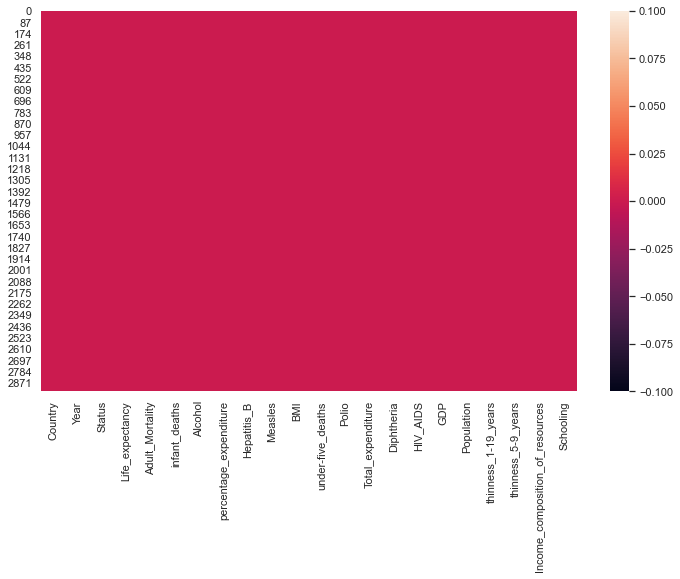

In [18]:
sns.heatmap(data.isnull())

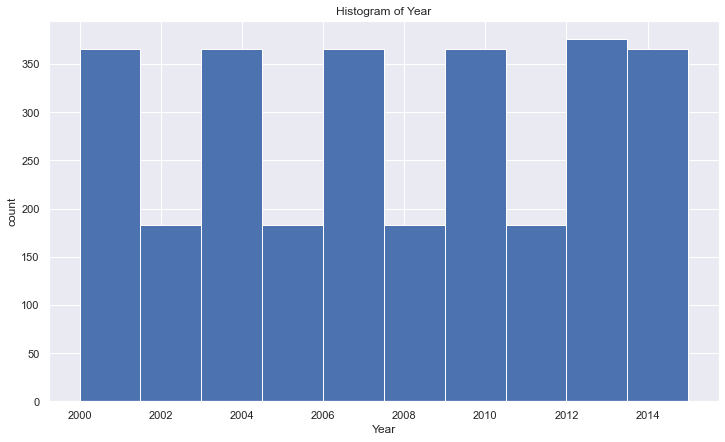

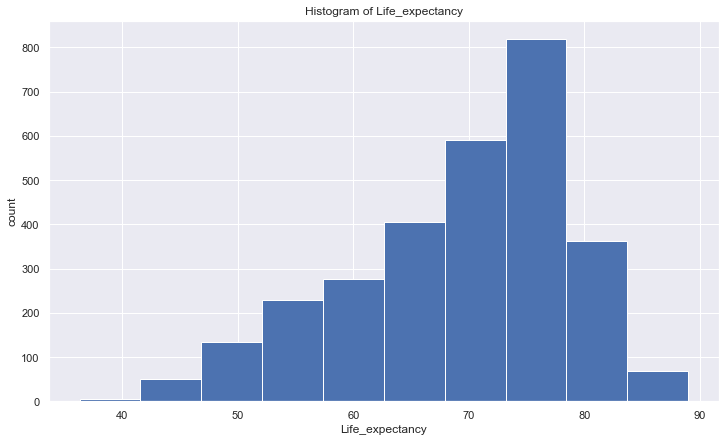

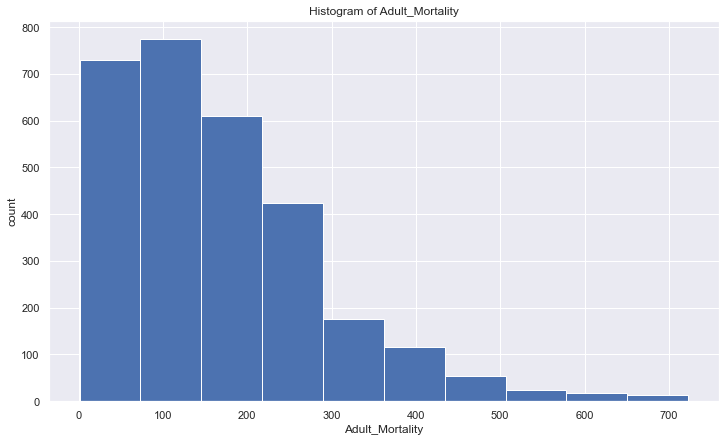

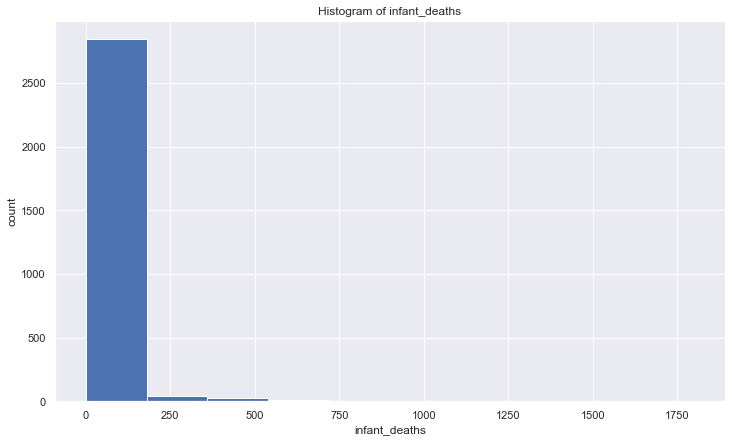

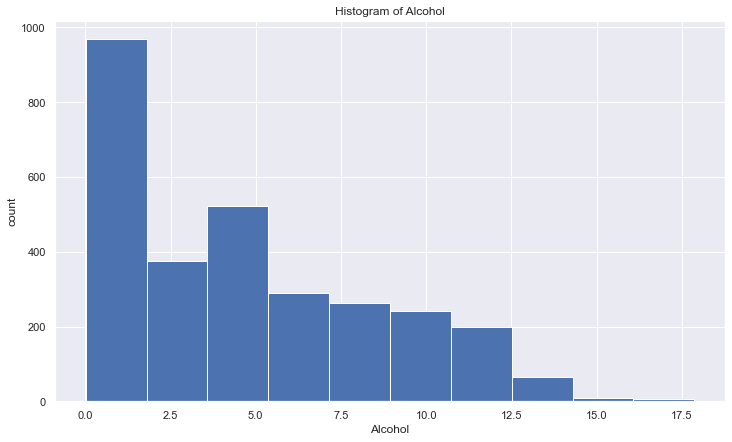

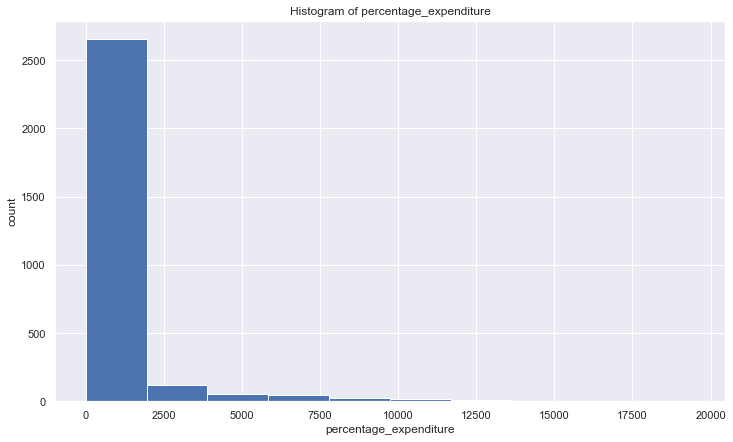

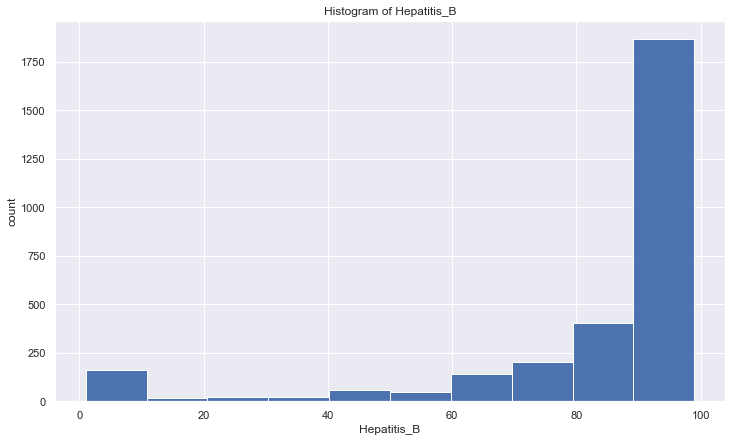

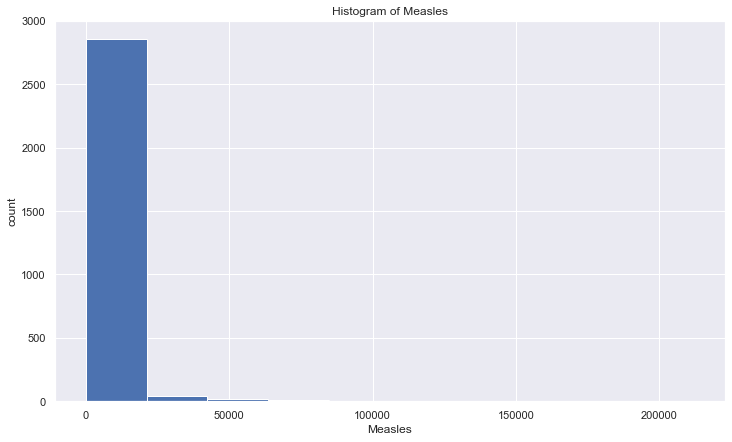

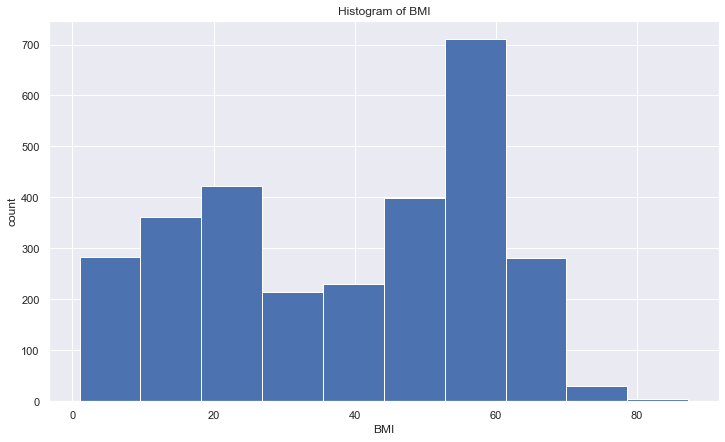

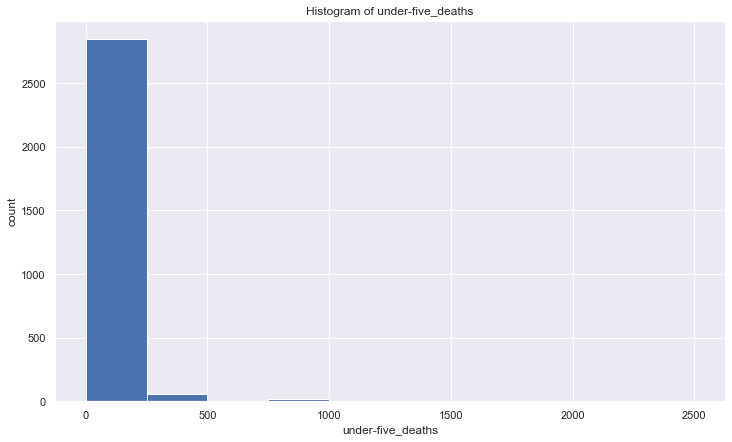

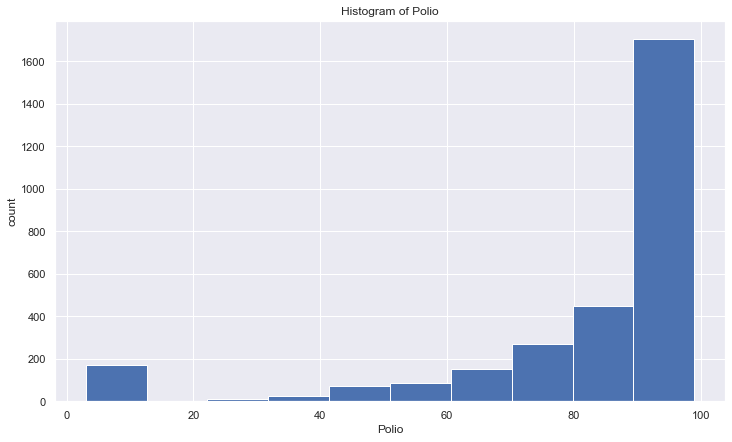

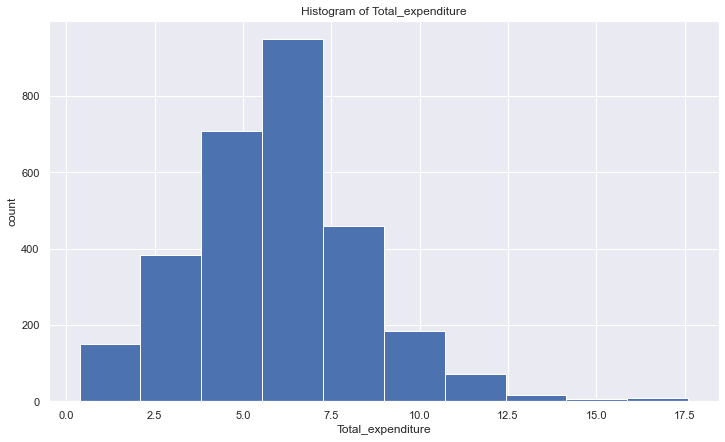

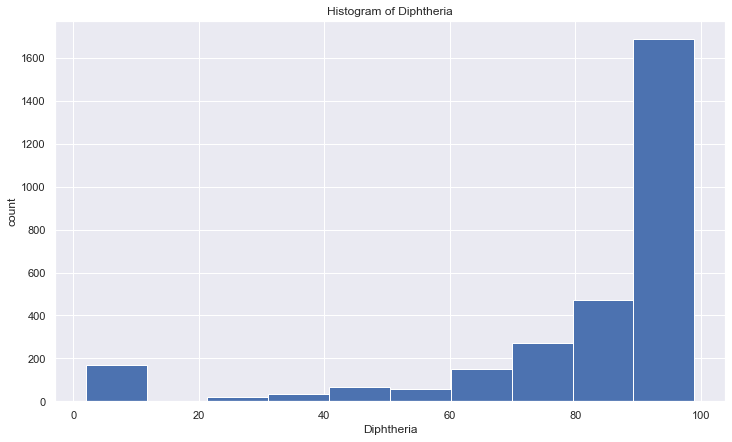

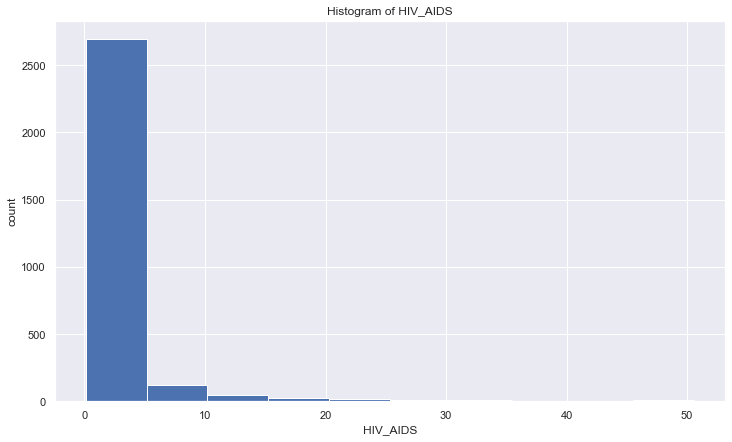

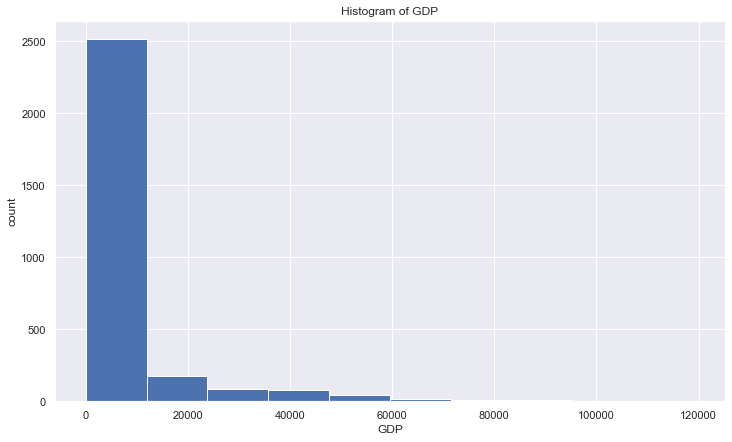

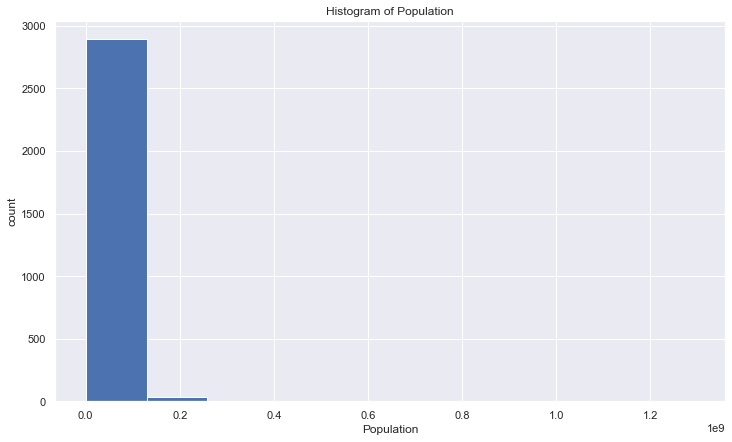

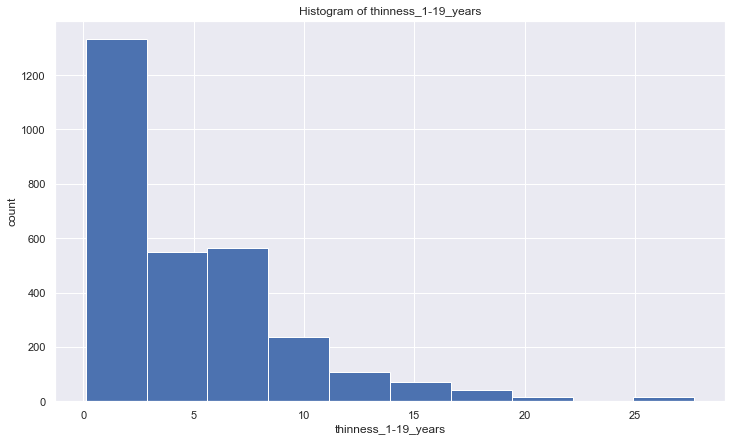

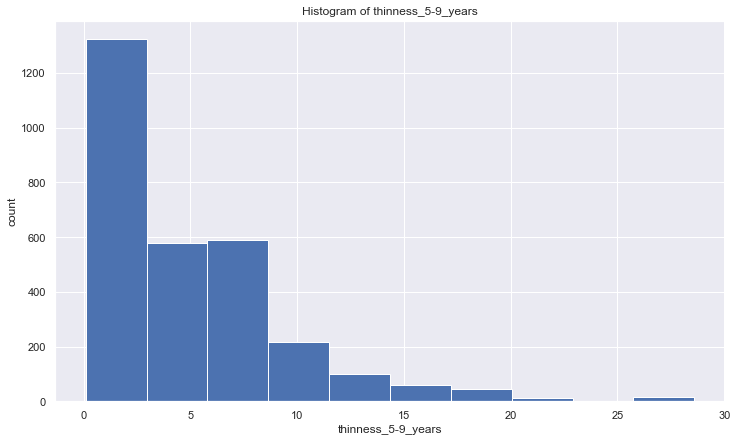

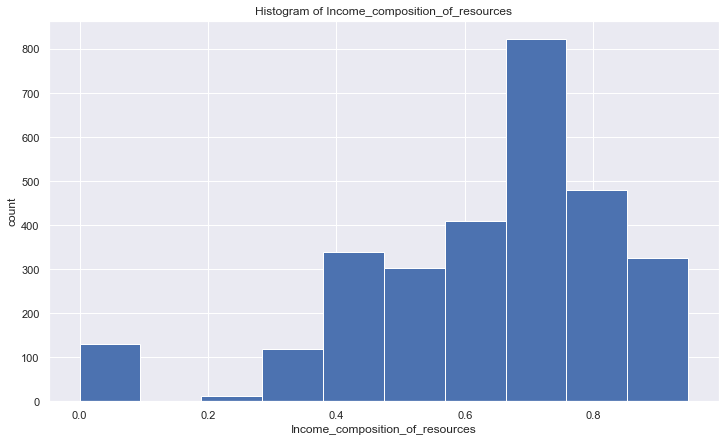

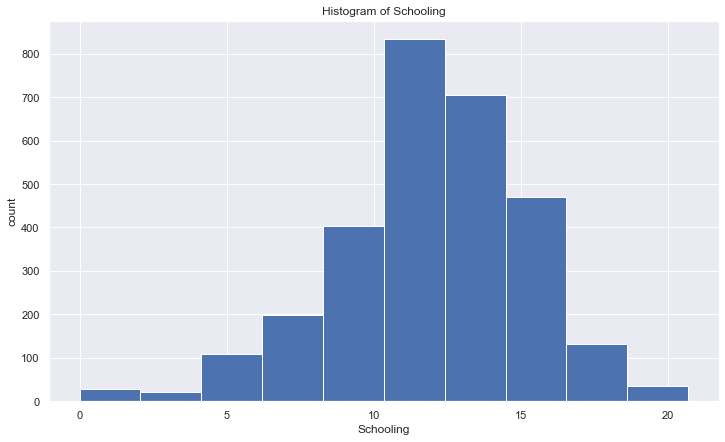

In [19]:
for col in data_num:
    plt.hist(data_num[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()
    print('')

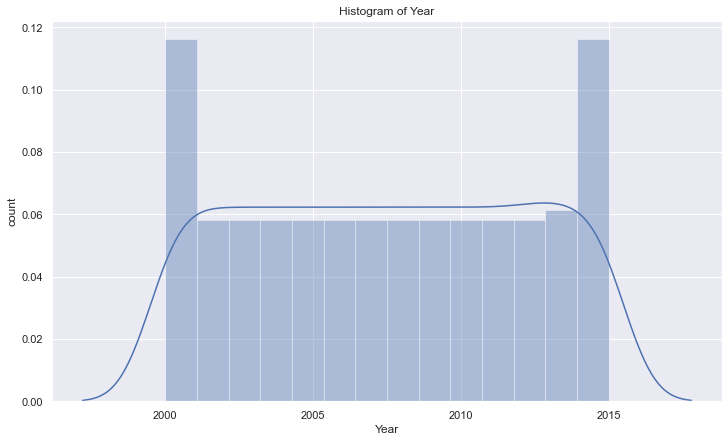

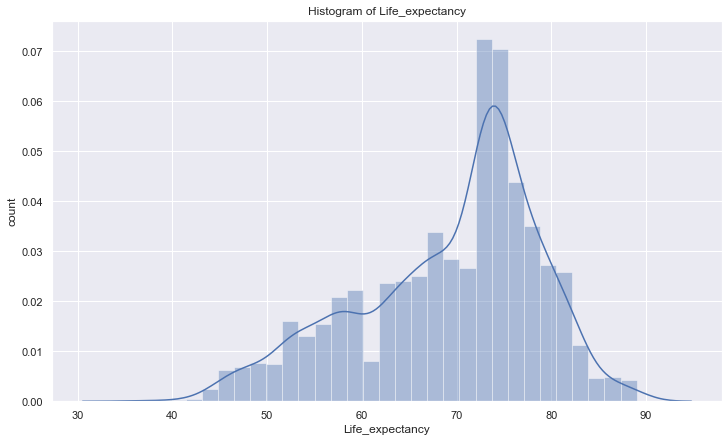

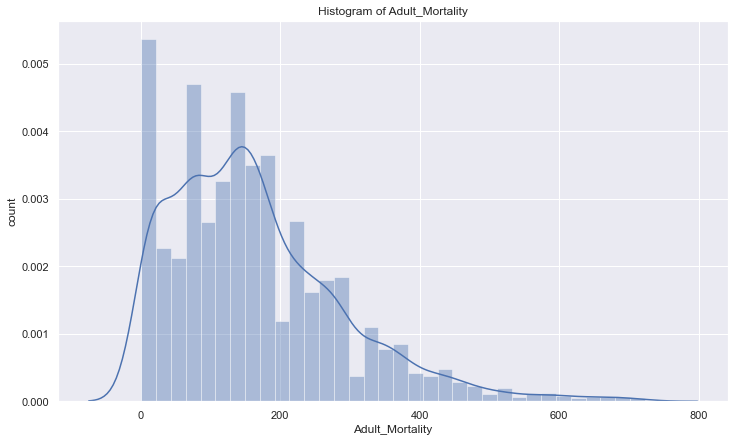

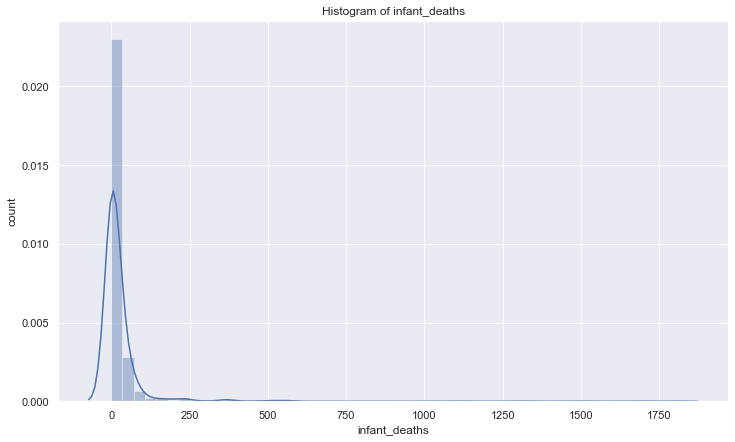

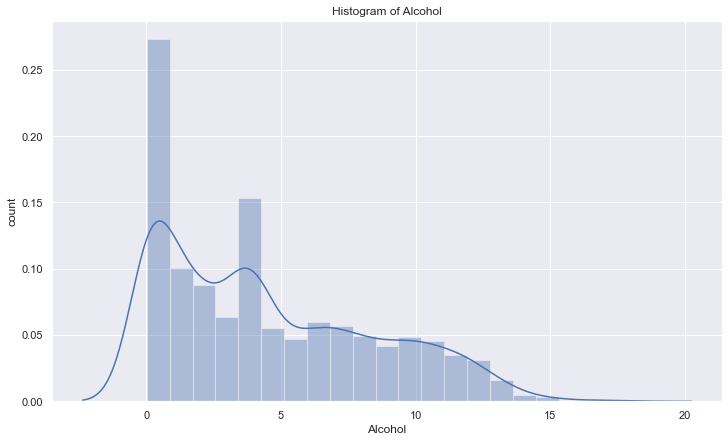

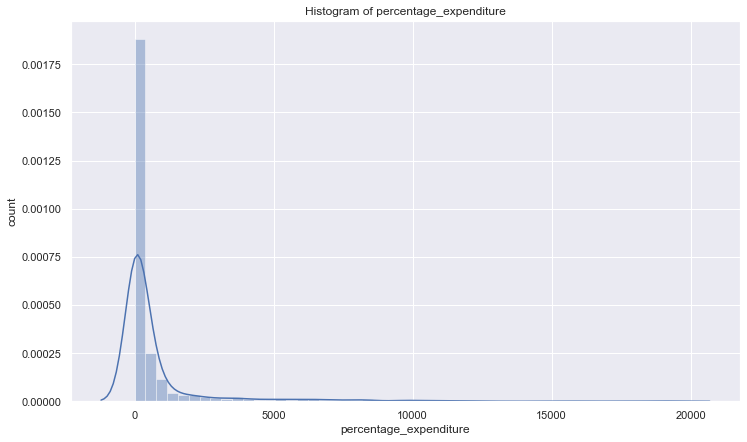

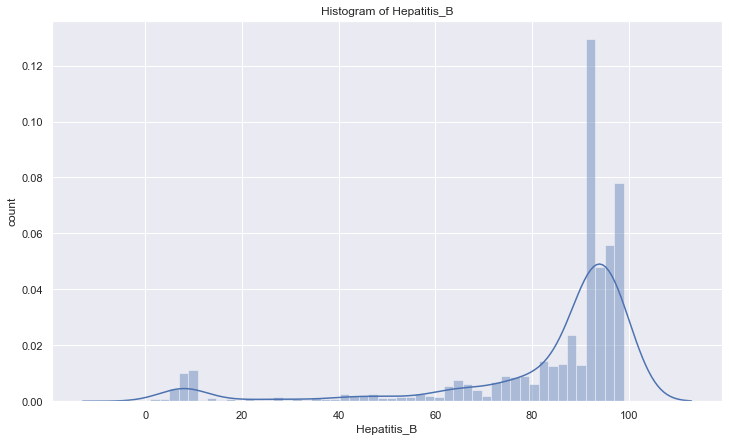

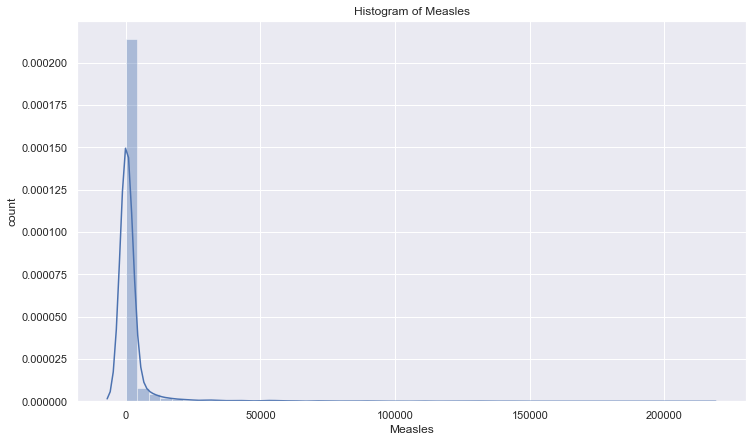

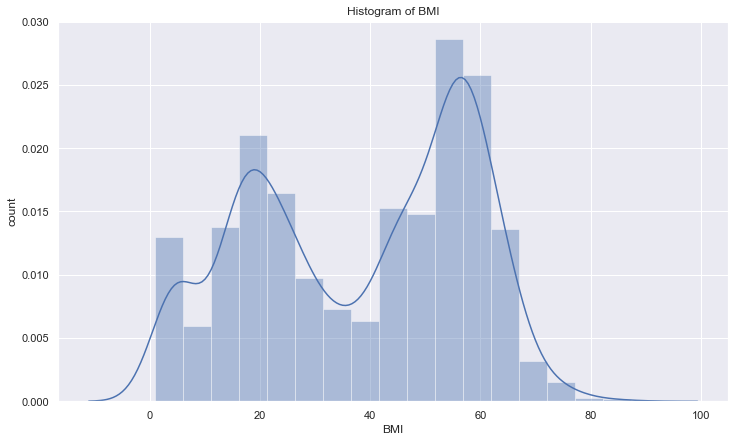

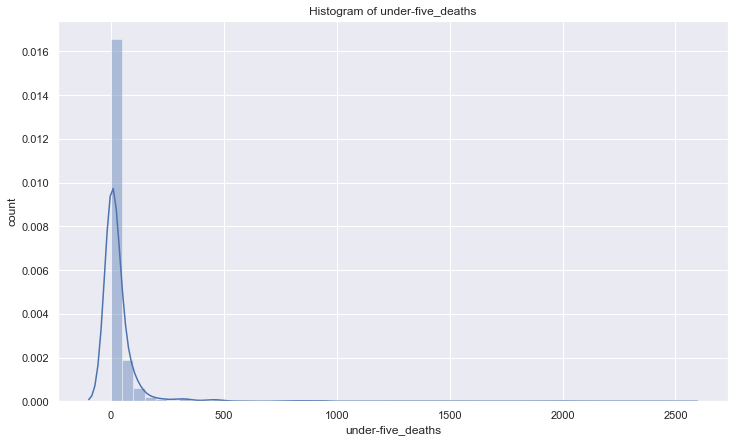

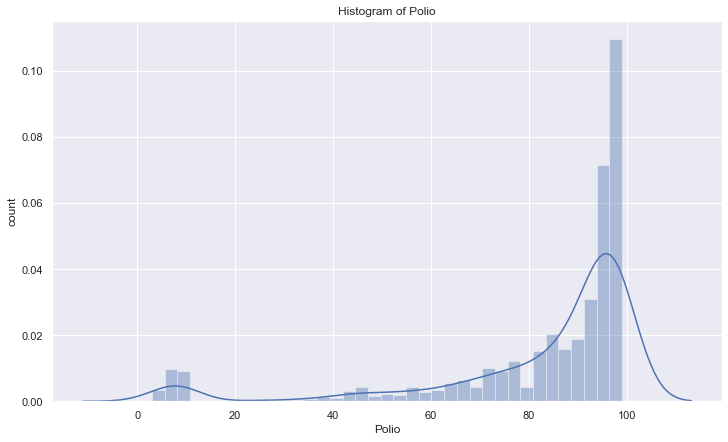

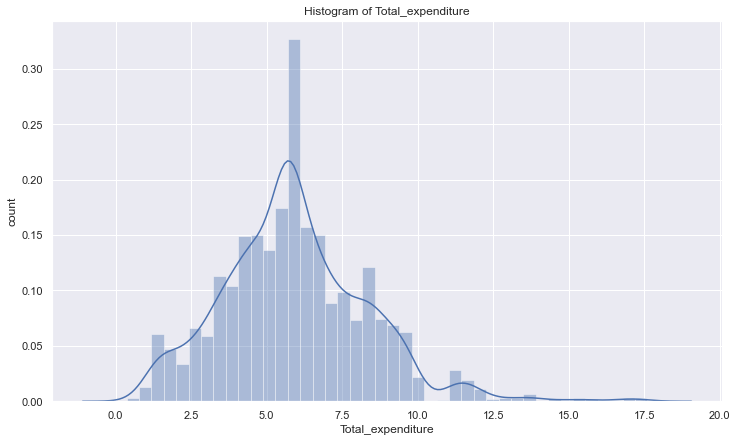

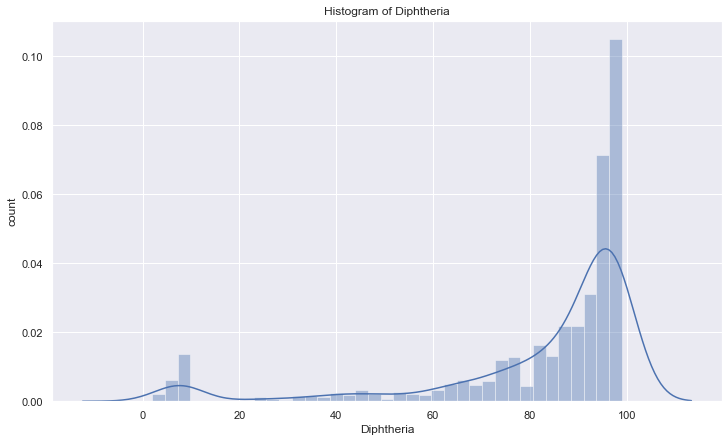

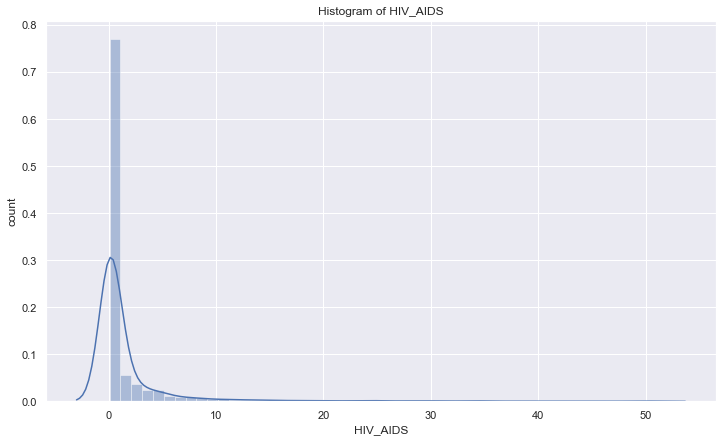

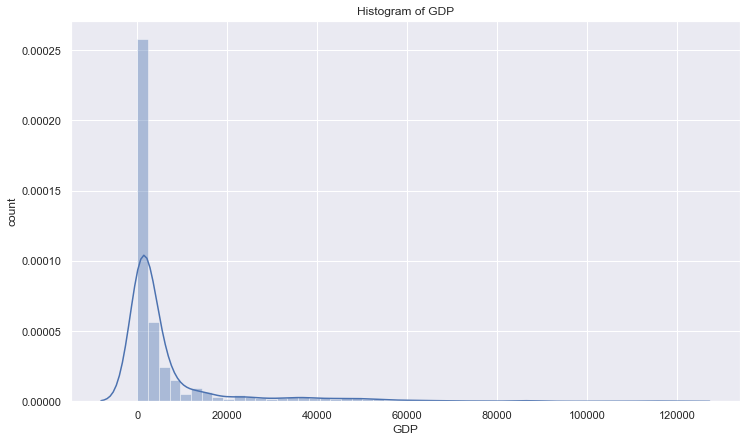

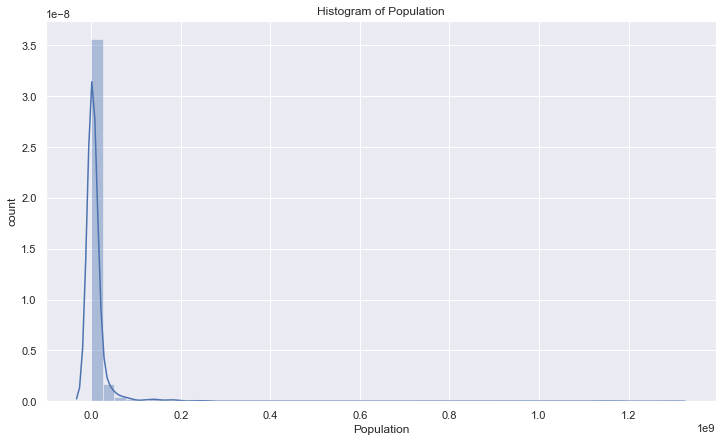

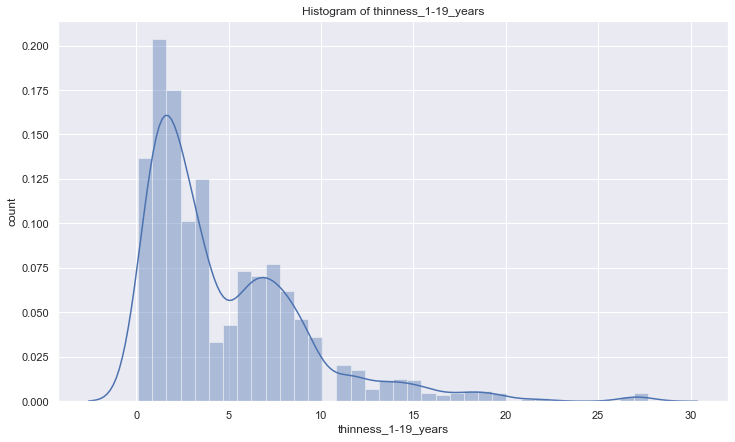

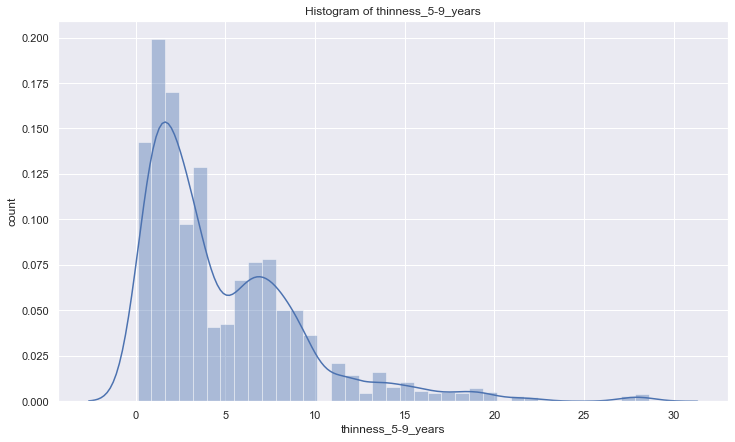

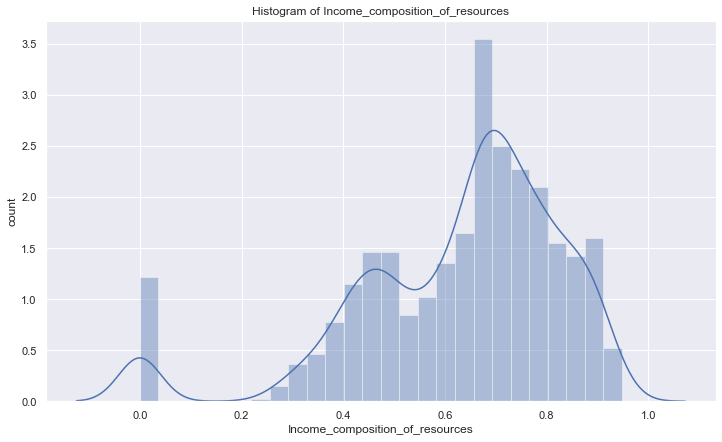

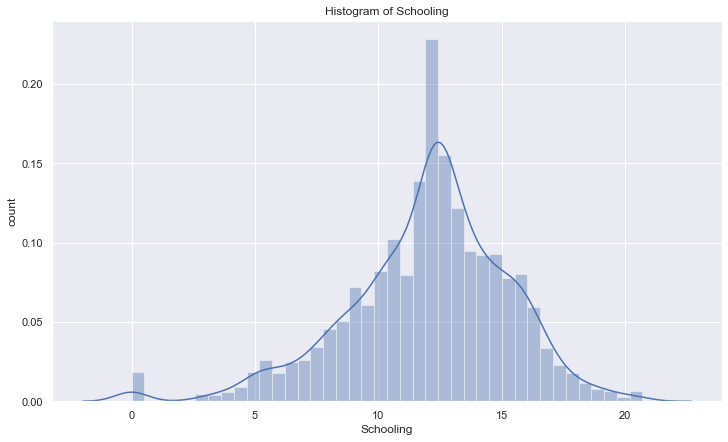

In [20]:
for col in data_num:
    sns.distplot(data_num[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Histogram of {}'.format(col))
    plt.show()
    print('')

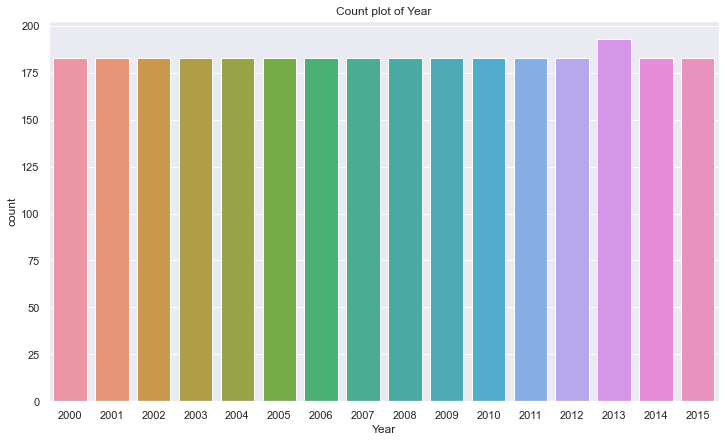

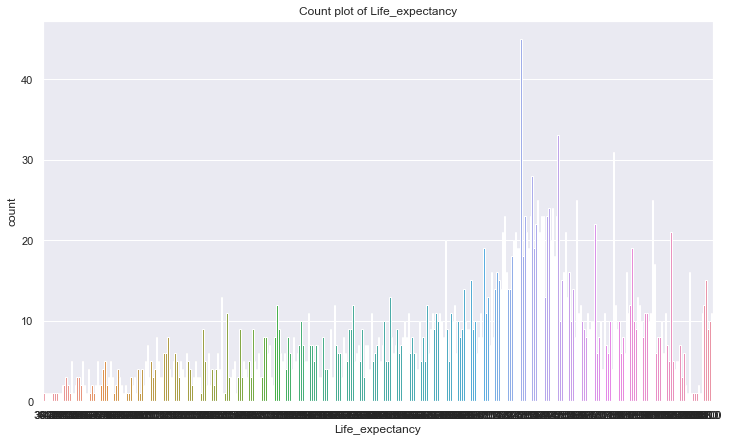

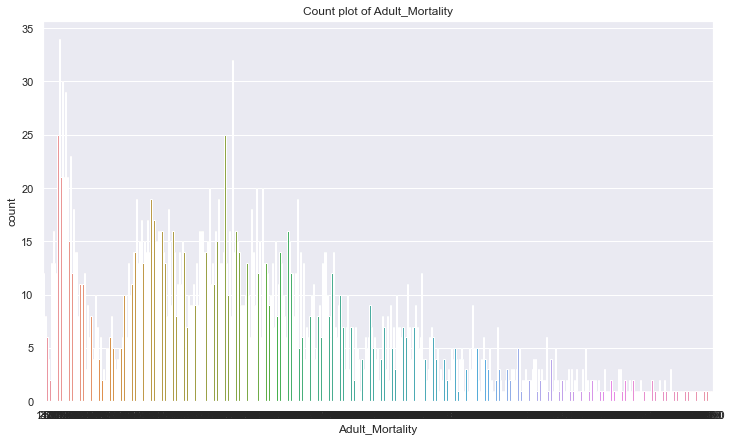

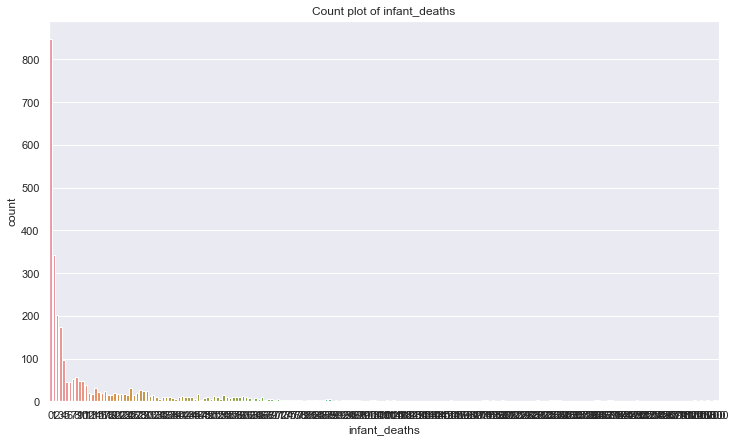

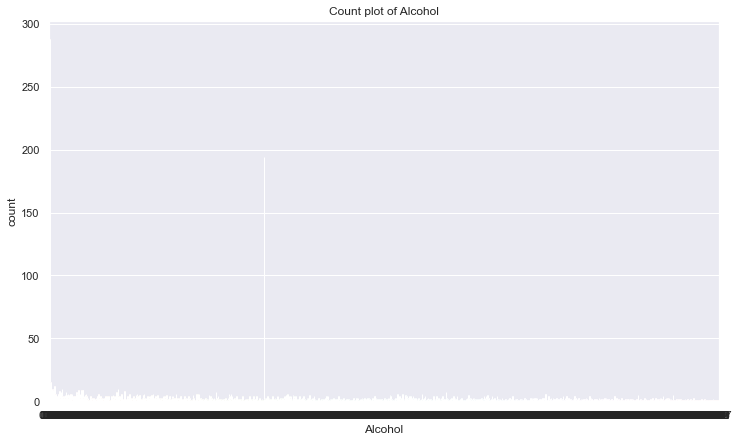

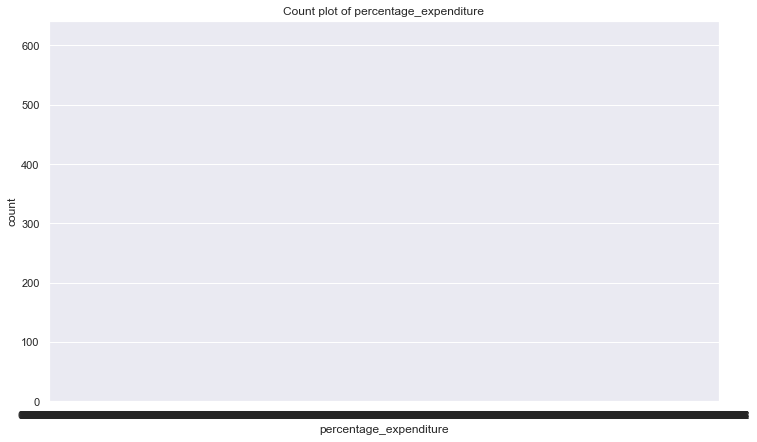

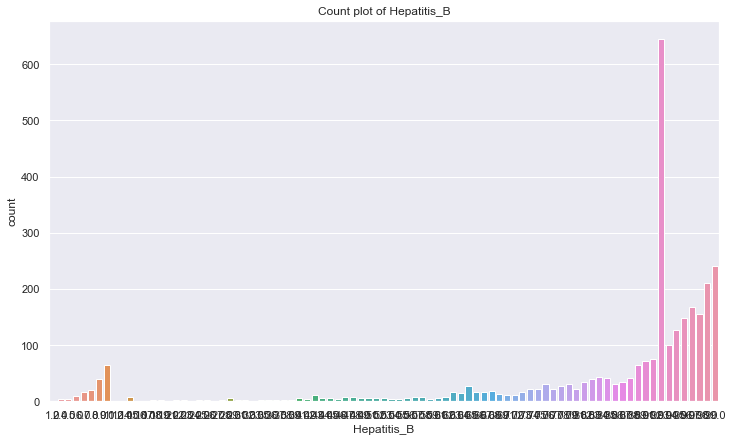

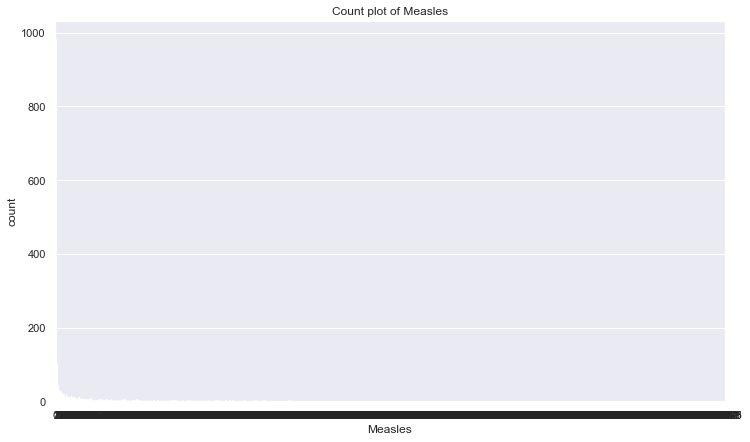

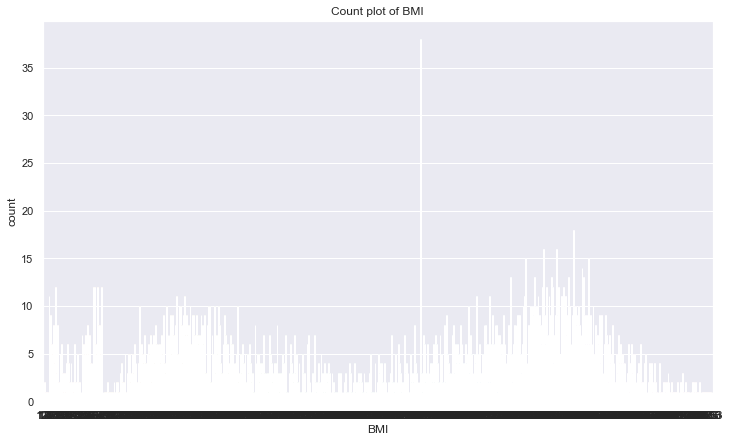

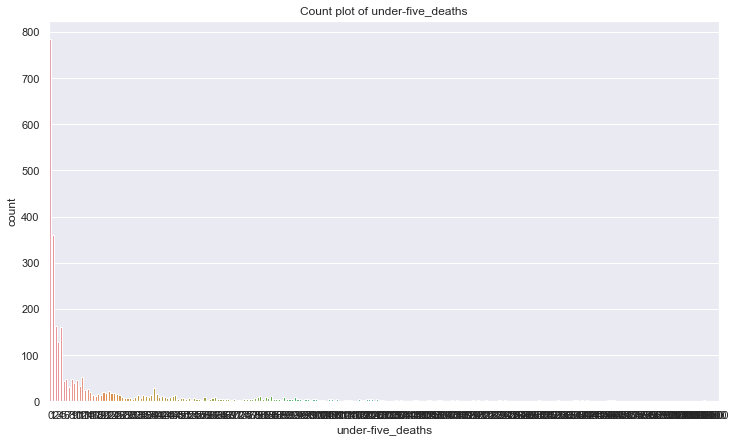

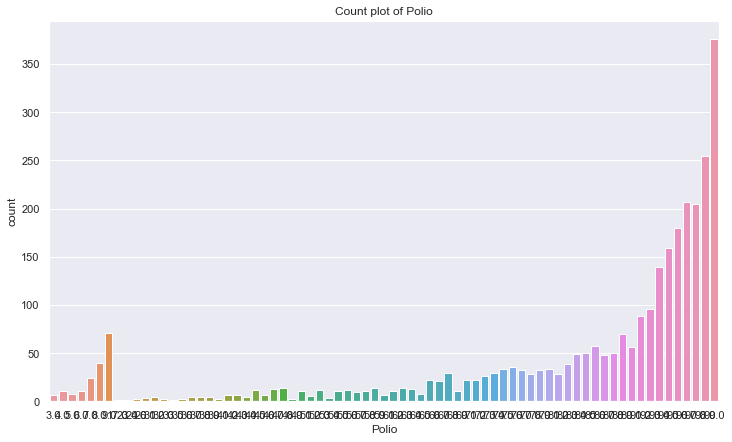

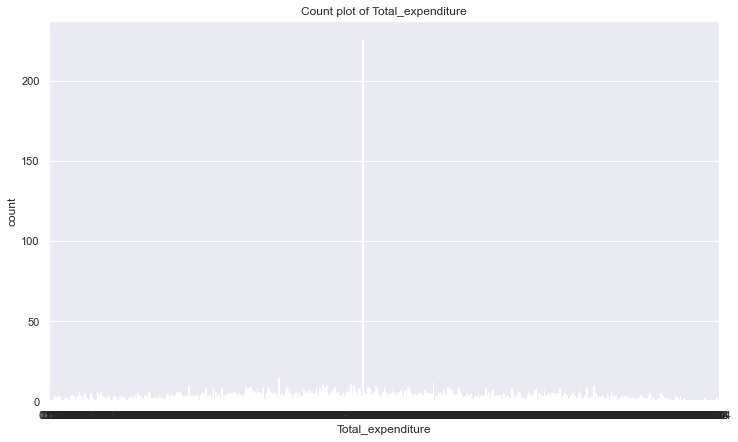

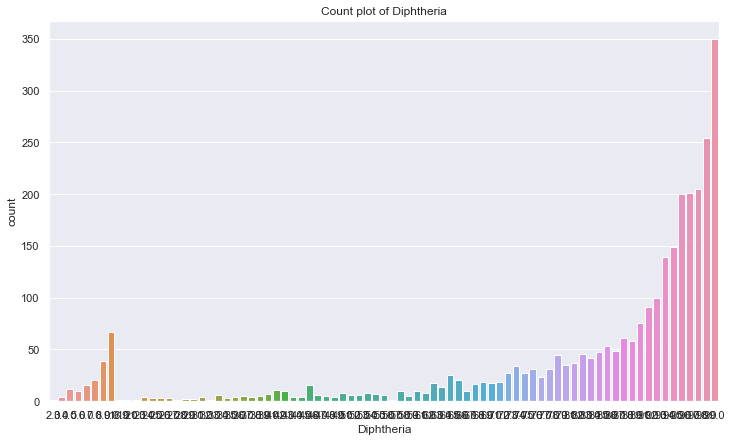

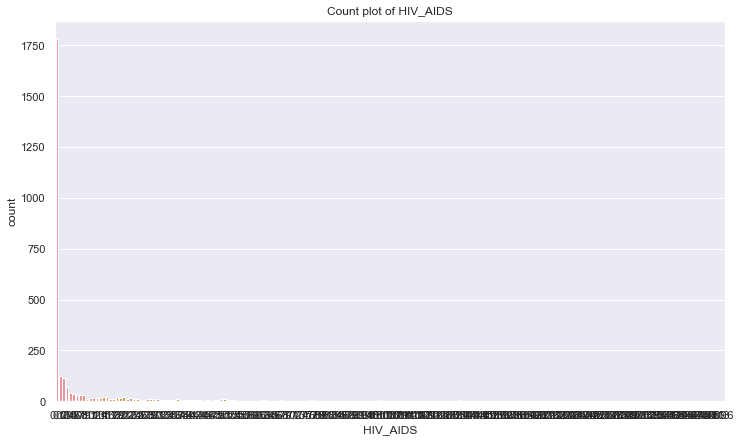

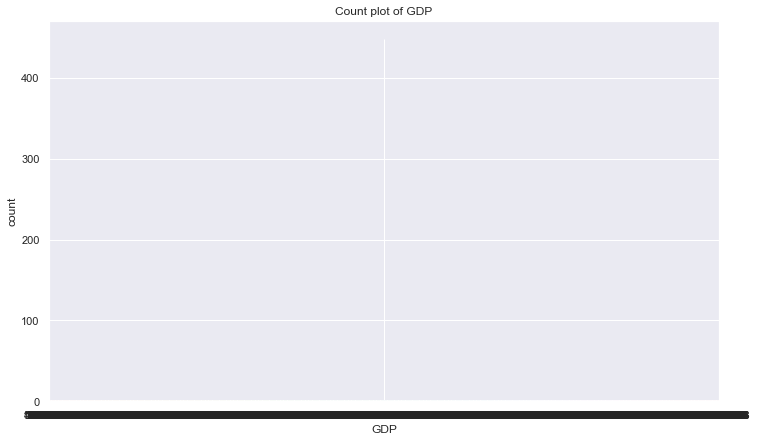

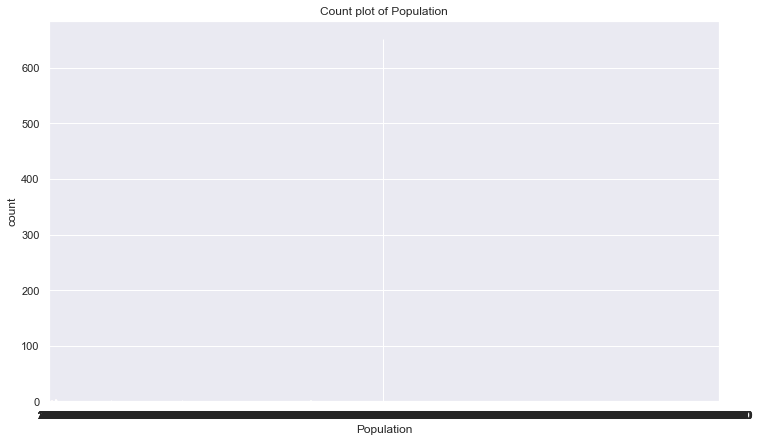

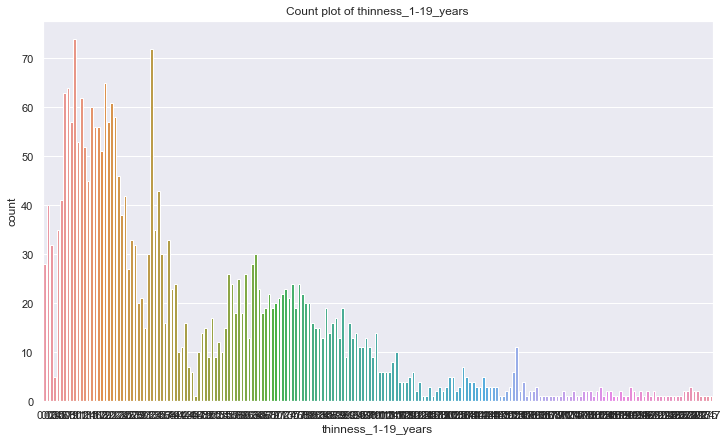

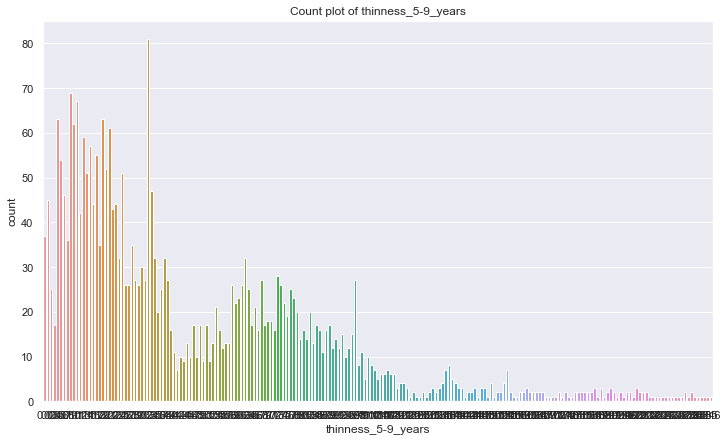

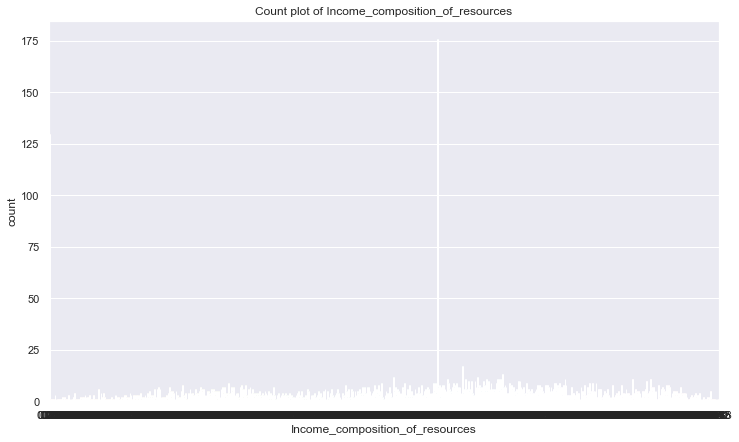

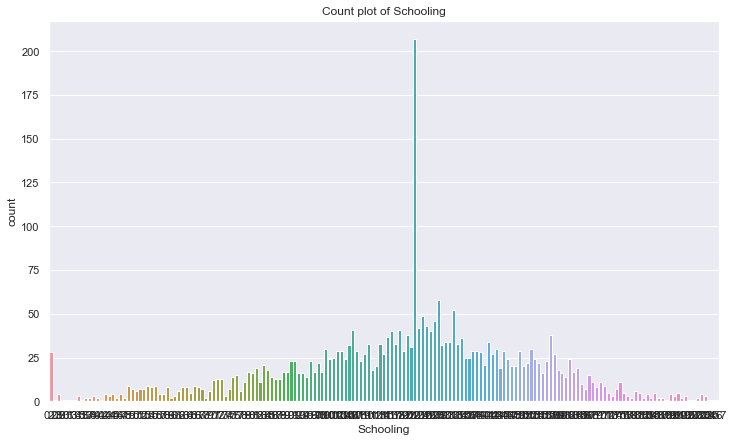

In [21]:
for col in data_num:
    sns.countplot(data_num[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Count plot of {}'.format(col))
    plt.show()
    print('')

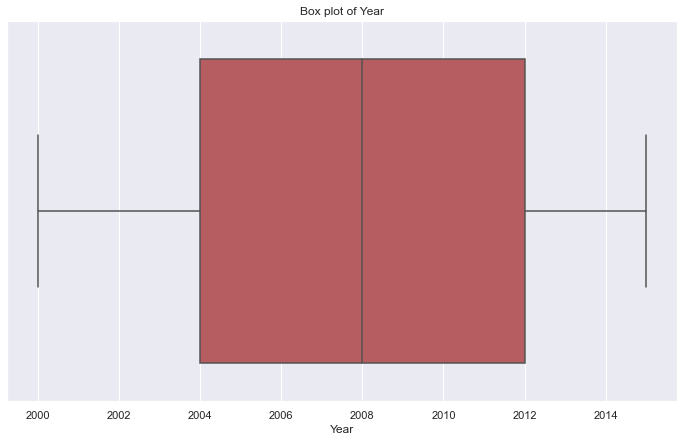

IQR of Year is 8.0
Upper_limit of Year is 2024.0
Lower_limit of Year is 1992.0
Length of Upper_limit of Year is 0
Length of Lower_limit of Year is 0



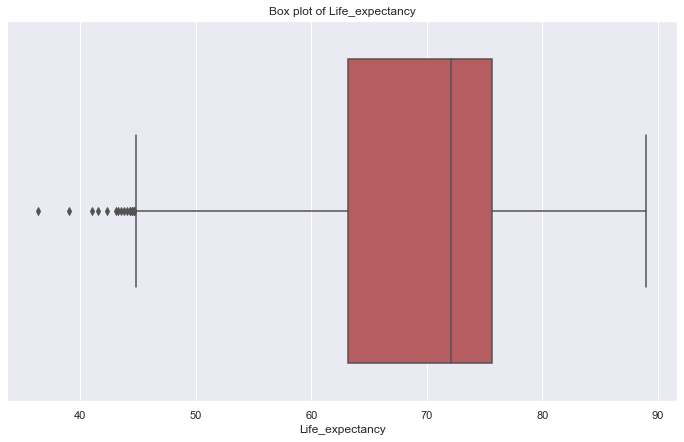

IQR of Life_expectancy is 12.399999999999991
Upper_limit of Life_expectancy is 94.19999999999999
Lower_limit of Life_expectancy is 44.600000000000016
Length of Upper_limit of Life_expectancy is 0
Length of Lower_limit of Life_expectancy is 17



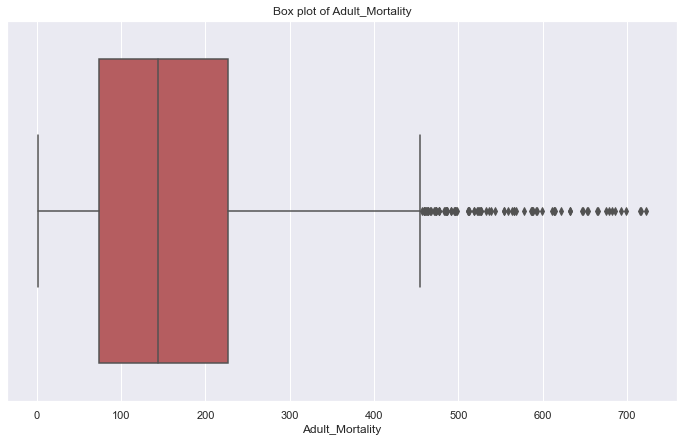

IQR of Adult_Mortality is 153.0
Upper_limit of Adult_Mortality is 456.5
Lower_limit of Adult_Mortality is -155.5
Length of Upper_limit of Adult_Mortality is 86
Length of Lower_limit of Adult_Mortality is 0



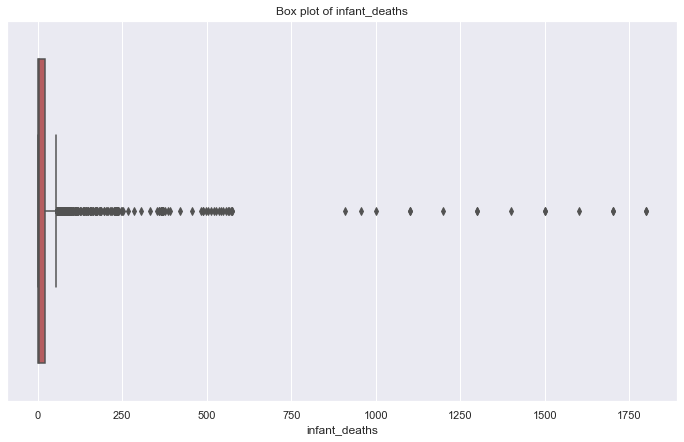

IQR of infant_deaths is 22.0
Upper_limit of infant_deaths is 55.0
Lower_limit of infant_deaths is -33.0
Length of Upper_limit of infant_deaths is 315
Length of Lower_limit of infant_deaths is 0



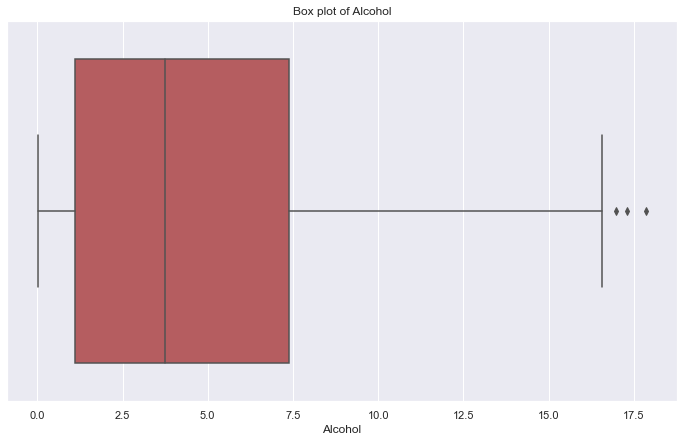

IQR of Alcohol is 6.297499999999999
Upper_limit of Alcohol is 16.83625
Lower_limit of Alcohol is -8.35375
Length of Upper_limit of Alcohol is 3
Length of Lower_limit of Alcohol is 0



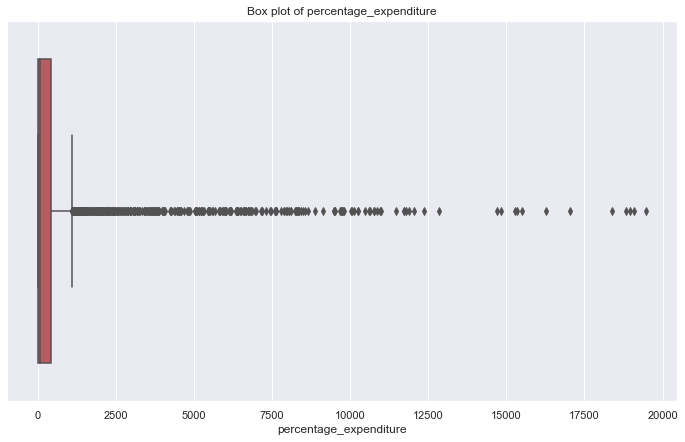

IQR of percentage_expenditure is 436.84880176475
Upper_limit of percentage_expenditure is 1096.807346997125
Lower_limit of percentage_expenditure is -650.587860061875
Length of Upper_limit of percentage_expenditure is 389
Length of Lower_limit of percentage_expenditure is 0



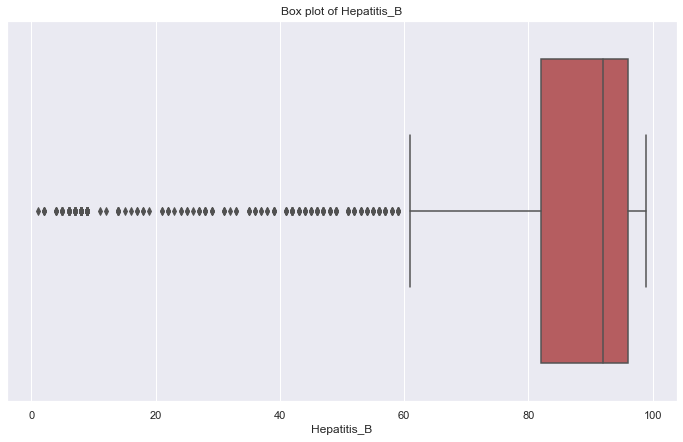

IQR of Hepatitis_B is 14.0
Upper_limit of Hepatitis_B is 117.0
Lower_limit of Hepatitis_B is 61.0
Length of Upper_limit of Hepatitis_B is 0
Length of Lower_limit of Hepatitis_B is 322



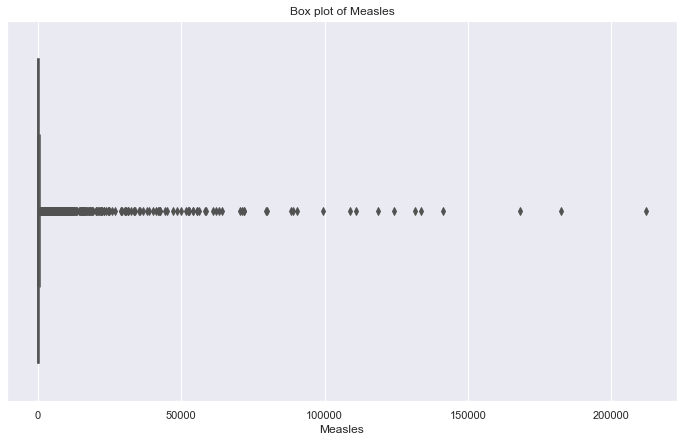

IQR of Measles is 360.25
Upper_limit of Measles is 900.625
Lower_limit of Measles is -540.375
Length of Upper_limit of Measles is 542
Length of Lower_limit of Measles is 0



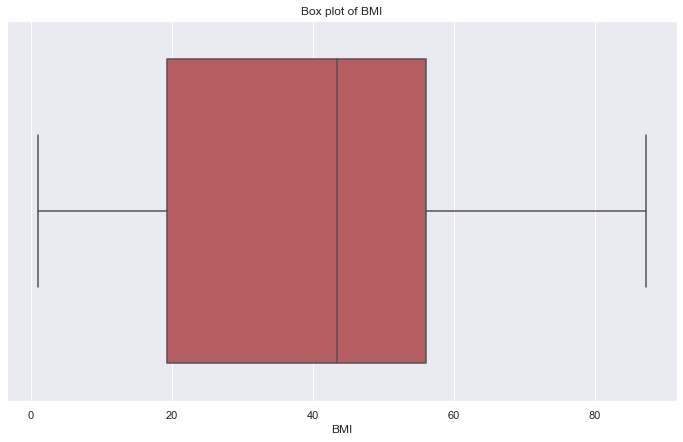

IQR of BMI is 36.7
Upper_limit of BMI is 111.15
Lower_limit of BMI is -35.650000000000006
Length of Upper_limit of BMI is 0
Length of Lower_limit of BMI is 0



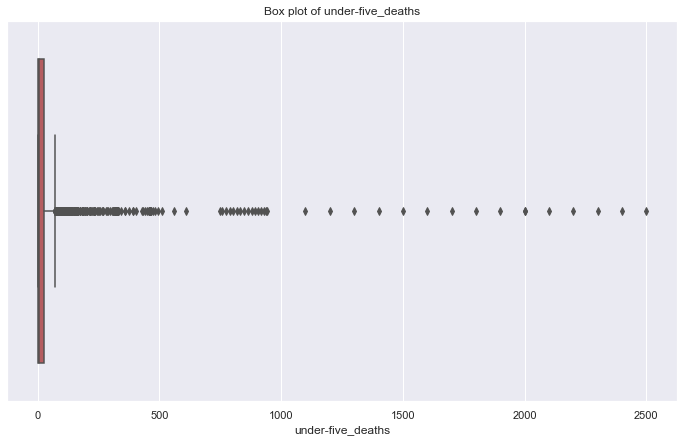

IQR of under-five_deaths is 28.0
Upper_limit of under-five_deaths is 70.0
Lower_limit of under-five_deaths is -42.0
Length of Upper_limit of under-five_deaths is 394
Length of Lower_limit of under-five_deaths is 0



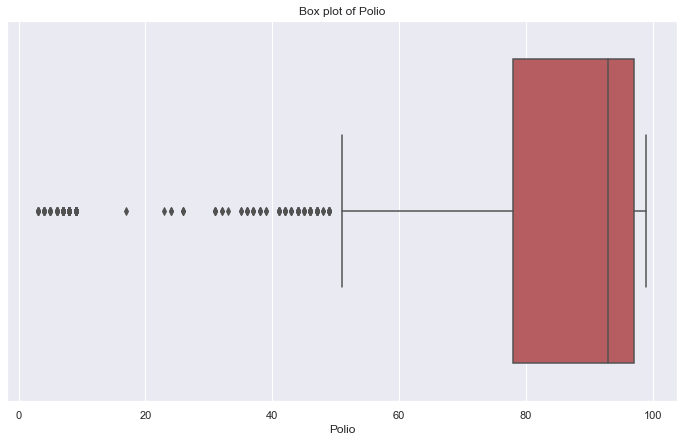

IQR of Polio is 19.0
Upper_limit of Polio is 125.5
Lower_limit of Polio is 49.5
Length of Upper_limit of Polio is 0
Length of Lower_limit of Polio is 279



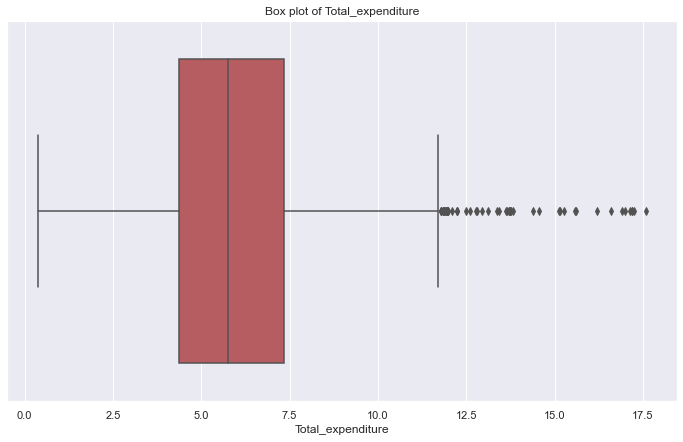

IQR of Total_expenditure is 2.96
Upper_limit of Total_expenditure is 11.77
Lower_limit of Total_expenditure is -0.0699999999999994
Length of Upper_limit of Total_expenditure is 51
Length of Lower_limit of Total_expenditure is 0



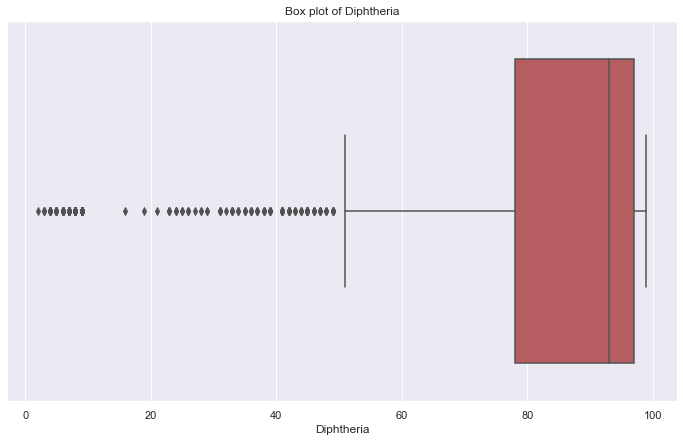

IQR of Diphtheria is 19.0
Upper_limit of Diphtheria is 125.5
Lower_limit of Diphtheria is 49.5
Length of Upper_limit of Diphtheria is 0
Length of Lower_limit of Diphtheria is 298



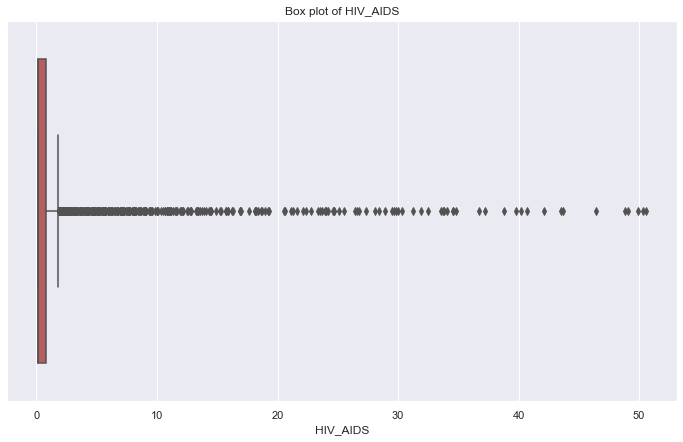

IQR of HIV_AIDS is 0.7000000000000001
Upper_limit of HIV_AIDS is 1.85
Lower_limit of HIV_AIDS is -0.9500000000000001
Length of Upper_limit of HIV_AIDS is 542
Length of Lower_limit of HIV_AIDS is 0



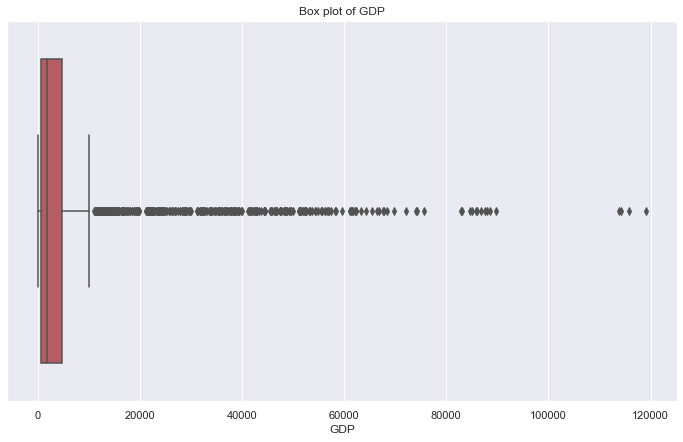

IQR of GDP is 4198.918194499999
Upper_limit of GDP is 11077.782481749999
Lower_limit of GDP is -5717.890296249999
Length of Upper_limit of GDP is 445
Length of Lower_limit of GDP is 0



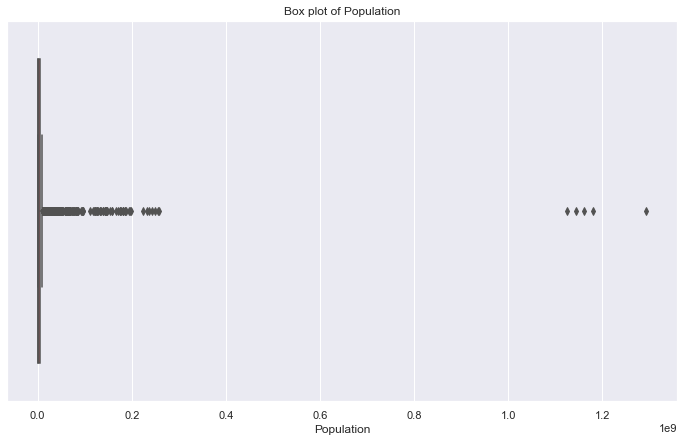

IQR of Population is 4165454.0
Upper_limit of Population is 10832552.25
Lower_limit of Population is -5829263.75
Length of Upper_limit of Population is 452
Length of Lower_limit of Population is 0



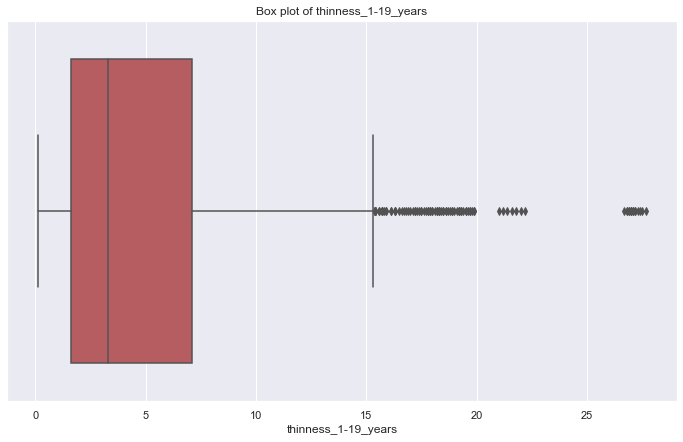

IQR of thinness_1-19_years is 5.5
Upper_limit of thinness_1-19_years is 15.35
Lower_limit of thinness_1-19_years is -6.65
Length of Upper_limit of thinness_1-19_years is 100
Length of Lower_limit of thinness_1-19_years is 0



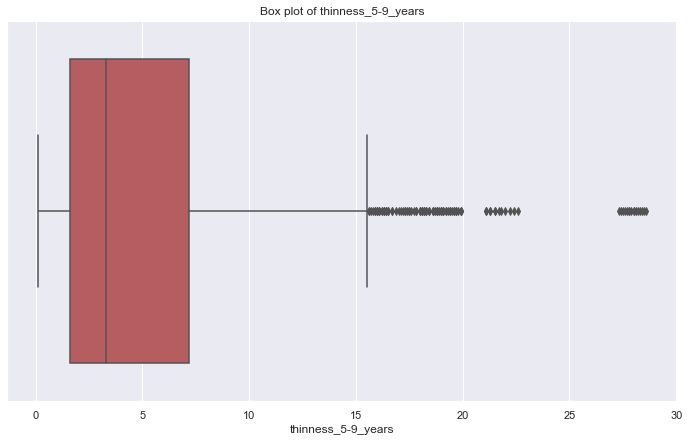

IQR of thinness_5-9_years is 5.6
Upper_limit of thinness_5-9_years is 15.599999999999998
Lower_limit of thinness_5-9_years is -6.799999999999999
Length of Upper_limit of thinness_5-9_years is 99
Length of Lower_limit of thinness_5-9_years is 0



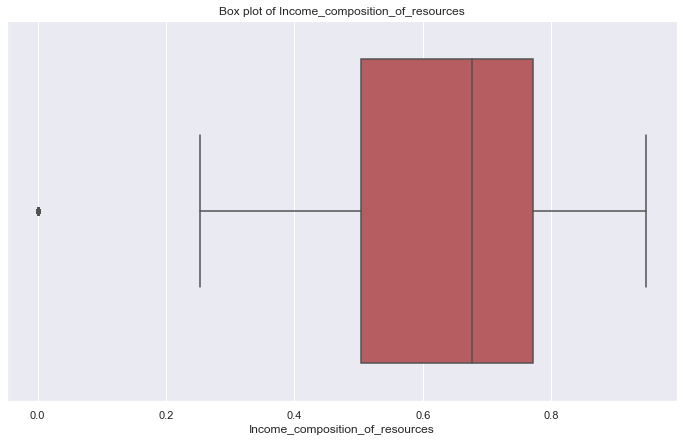

IQR of Income_composition_of_resources is 0.26775000000000004
Upper_limit of Income_composition_of_resources is 1.1736250000000001
Lower_limit of Income_composition_of_resources is 0.10262499999999991
Length of Upper_limit of Income_composition_of_resources is 0
Length of Lower_limit of Income_composition_of_resources is 130



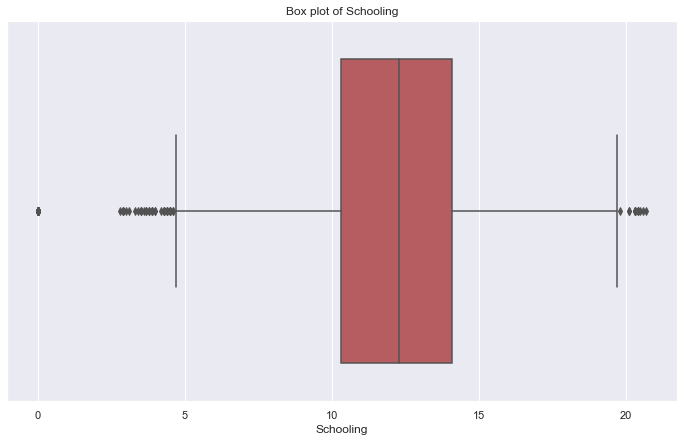

IQR of Schooling is 3.799999999999999
Upper_limit of Schooling is 19.799999999999997
Lower_limit of Schooling is 4.600000000000002
Length of Upper_limit of Schooling is 13
Length of Lower_limit of Schooling is 64



In [22]:
for col in data_num:
    sns.boxplot(data_num[col], color = 'r')
    plt.xlabel(col)
    plt.title('Box plot of {}'.format(col))
    plt.show()
    IQR = data[col].quantile(0.75)-data[col].quantile(0.25)
    print(f'IQR of {col} is {IQR}')
    upper_limit= data[col].quantile(0.75)+ (1.5*IQR)
    print(f'Upper_limit of {col} is {upper_limit}')
    lower_limit= data[col].quantile(0.25)- (1.5*IQR)
    print(f'Lower_limit of {col} is {lower_limit}')
    length_upper = len(data[col][data[col]>upper_limit])
    print(f'Length of Upper_limit of {col} is {length_upper}')
    length_lower = len(data[col][data[col]<lower_limit])
    print(f'Length of Lower_limit of {col} is {length_lower}')
    print('')

In [23]:
data['Life_expectancy'] = np.where(data['Life_expectancy']<44.2, 44.2, data['Life_expectancy']) 
data['Adult_Mortality'] = np.where(data['Adult_Mortality']>459.0, 459.0, data['Adult_Mortality']) 
data['infant_deaths'] = np.where(data['infant_deaths']>55.0, 55.0, data['infant_deaths']) 
data['percentage_expenditure'] = np.where(data['percentage_expenditure']>1096.807346997125, 1096.807346997125, data['percentage_expenditure']) 
data['Hepatitis_B'] = np.where(data['Hepatitis_B']<47.0, 47.0, data['Hepatitis_B']) 
data['Measles'] = np.where(data['Measles']>900.625, 900.625, data['Measles']) 
data['under-five_deaths'] = np.where(data['under-five_deaths']>70.0, 70.0, data['under-five_deaths']) 
data['Polio'] = np.where(data['Polio']<49.5, 49.5, data['Polio']) 
data['Total_expenditure'] = np.where(data['Total_expenditure']>12.341249999999999, 12.341249999999999, data['Total_expenditure']) 
data['Diphtheria'] = np.where(data['Diphtheria']<49.5, 49.5, data['Diphtheria']) 
data['HIV_AIDS'] = np.where(data['HIV_AIDS']>1.85, 1.85, data['HIV_AIDS']) 
data['GDP'] = np.where(data['GDP']>14081.112398500001, 14081.112398500001, data['GDP']) 
data['Population'] = np.where(data['Population']>18257207.625, 18257207.625, data['Population']) 
data['thinness_1-19_years'] = np.where(data['thinness_1-19_years']>15.599999999999998, 15.599999999999998, data['thinness_1-19_years']) 
data['thinness_5-9_years'] = np.where(data['thinness_5-9_years']>15.75, 15.75, data['thinness_5-9_years']) 
data['Income_composition_of_resources'] = np.where(data['Income_composition_of_resources']<0.06399999999999995, 0.06399999999999995, data['Income_composition_of_resources']) 
data['Schooling'] = np.where(data['Schooling']>20.6, 20.6, data['Schooling']) 
data['Schooling'] = np.where(data['Schooling']<3.799999999999998, 3.799999999999998, data['Schooling']) 


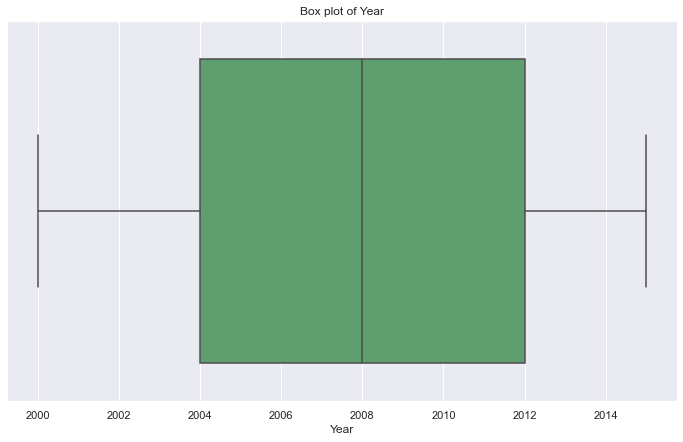

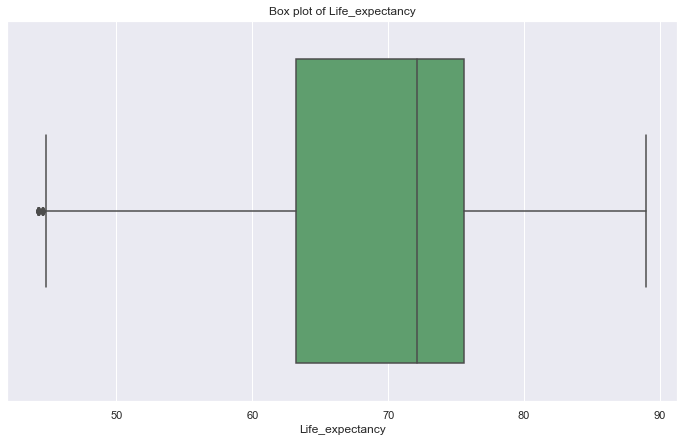

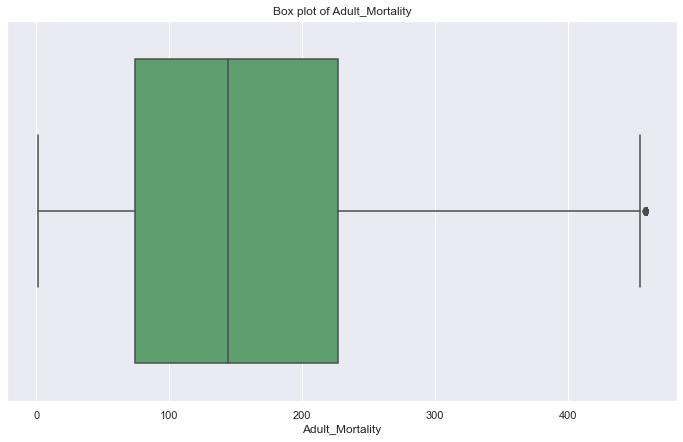

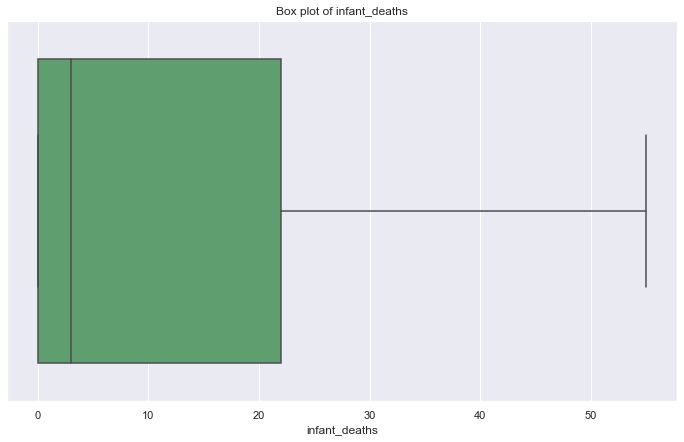

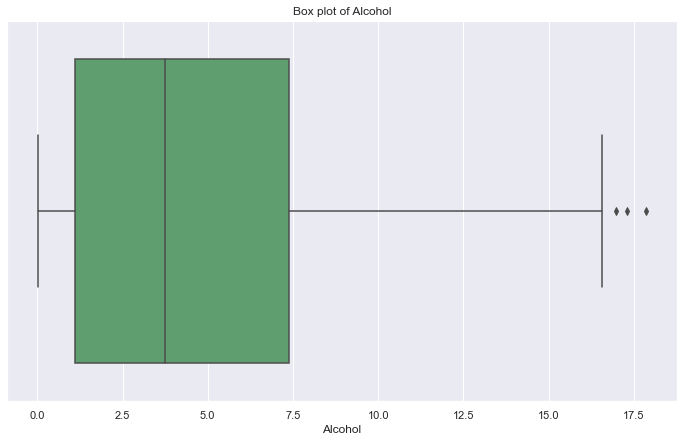

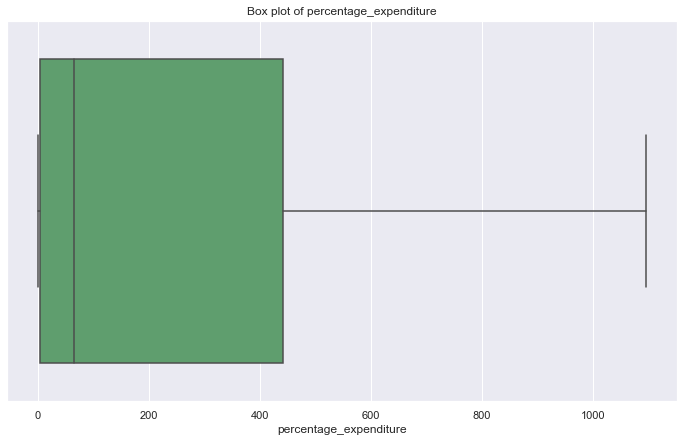

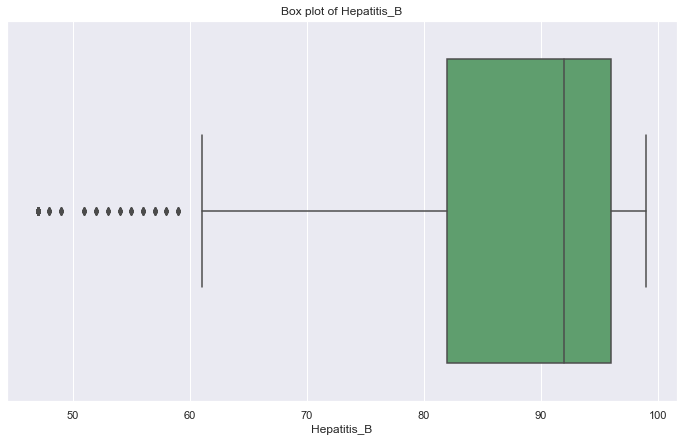

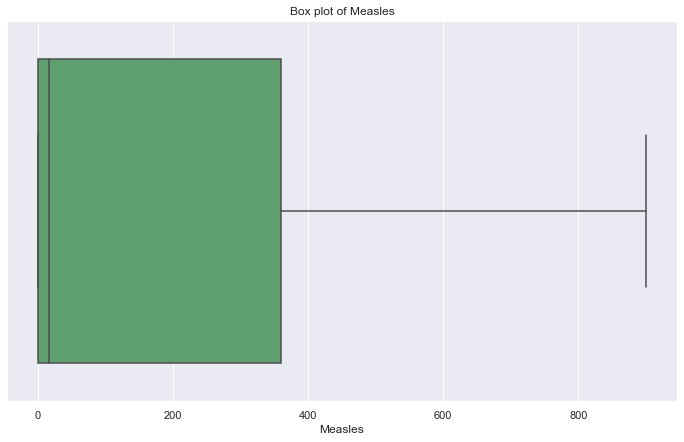

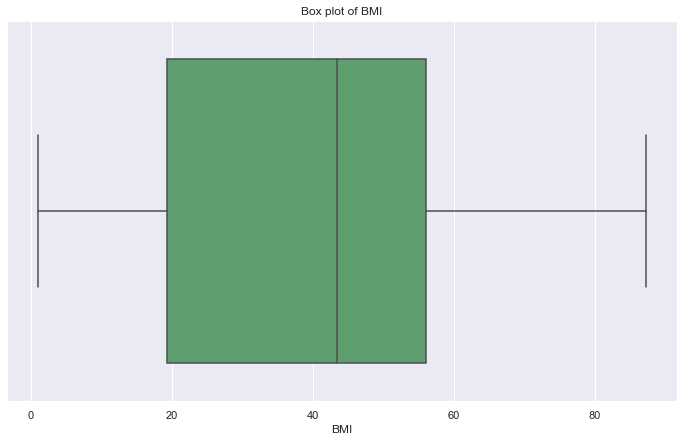

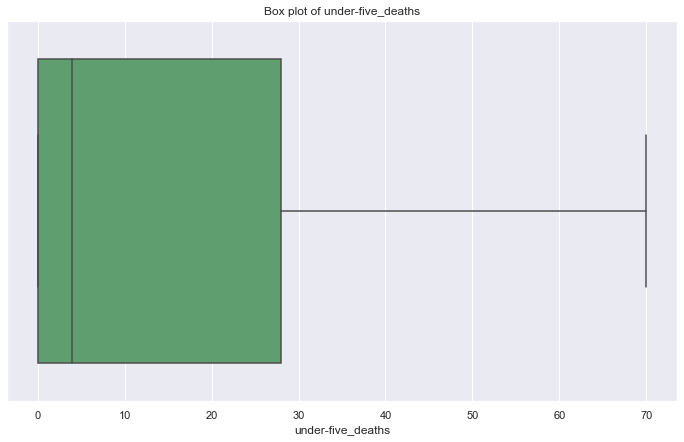

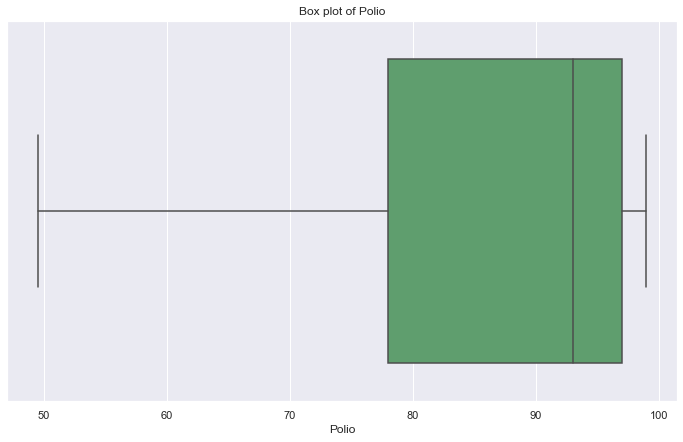

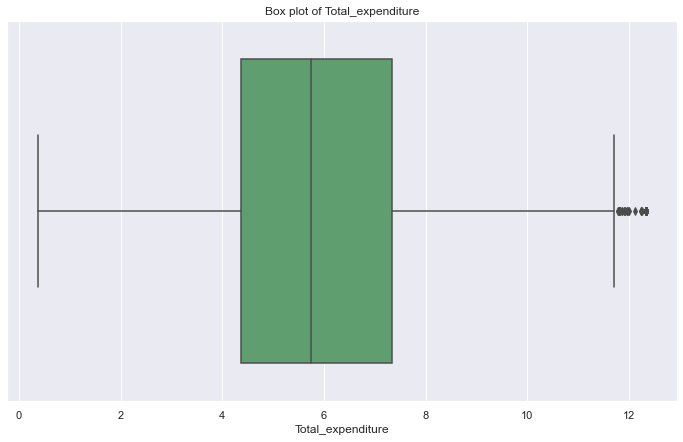

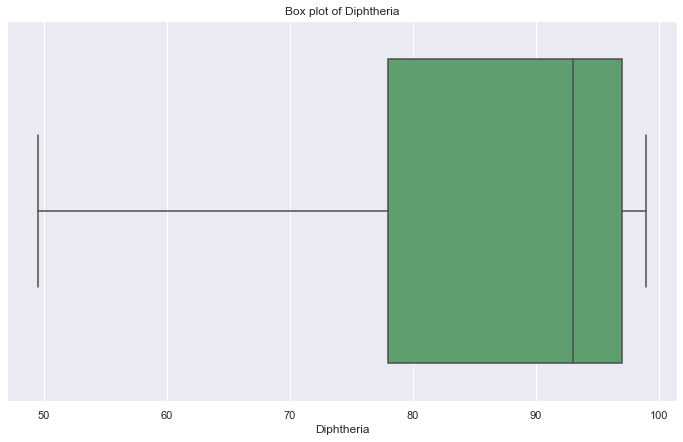

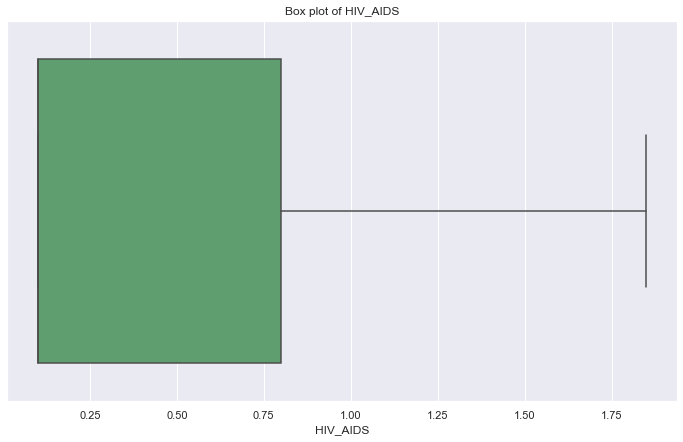

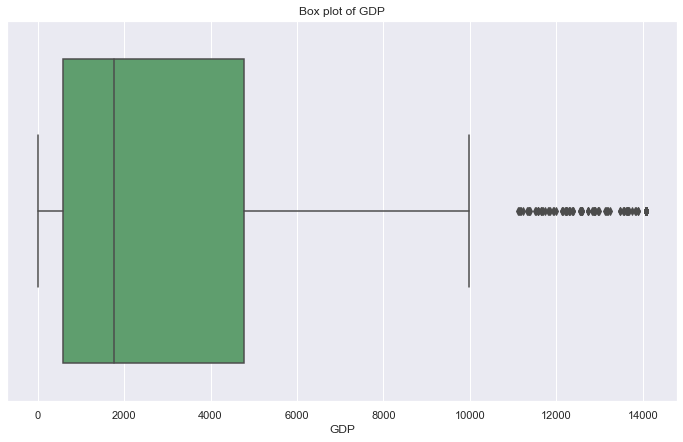

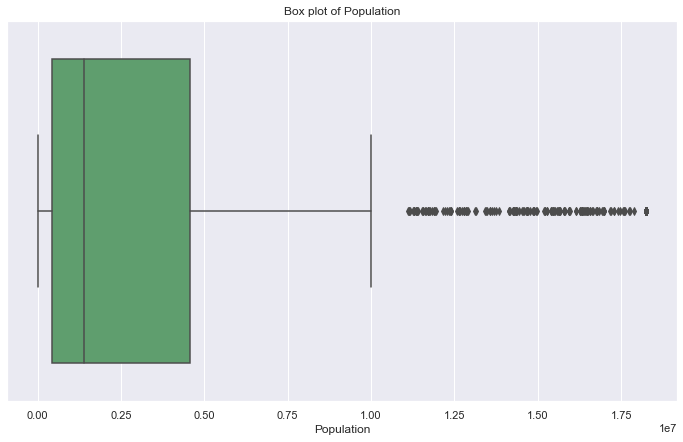

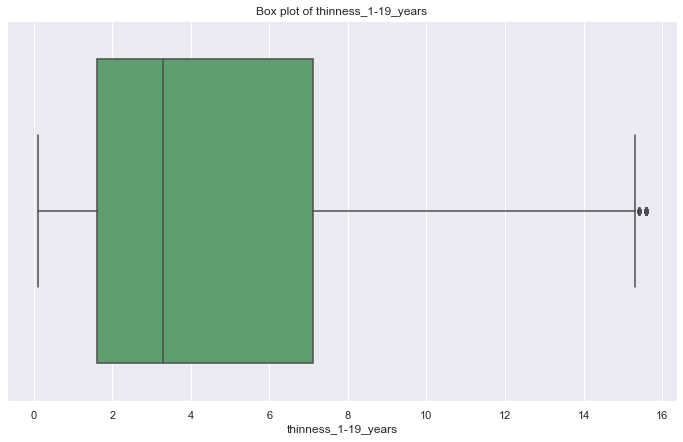

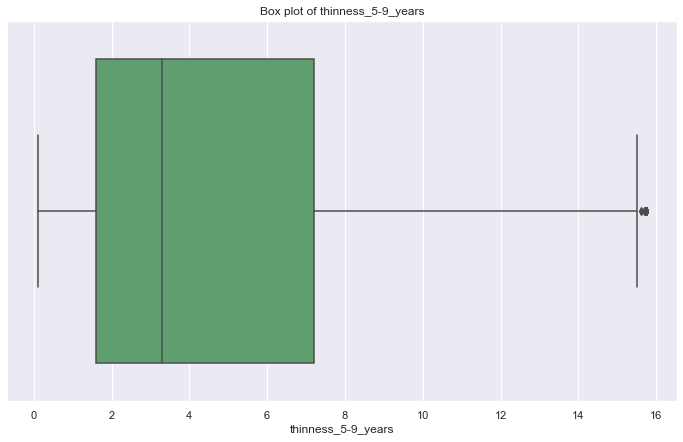

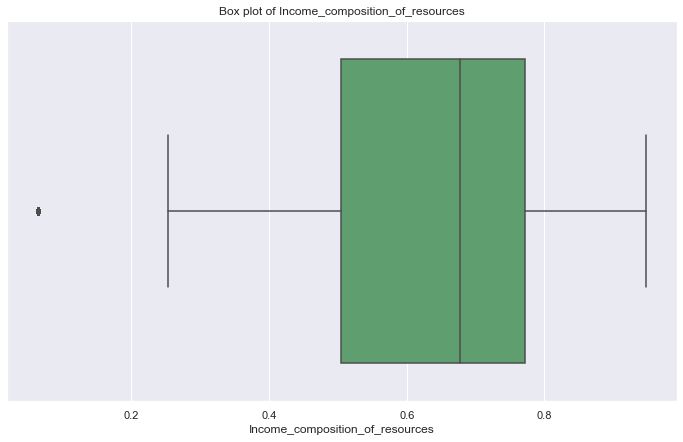

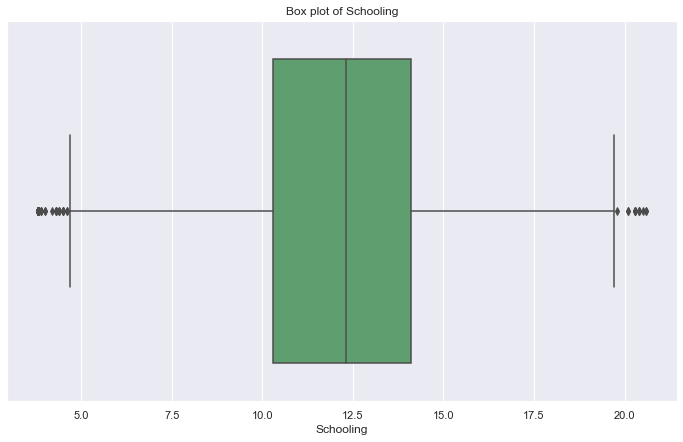

In [24]:
for col in data_num:
    sns.boxplot(data[col], color = 'g')
    plt.xlabel(col)
    plt.title('Box plot of {}'.format(col))
    plt.show()
    print('')

# Statistical test

In [25]:
corrmatrix = data_num.corr()

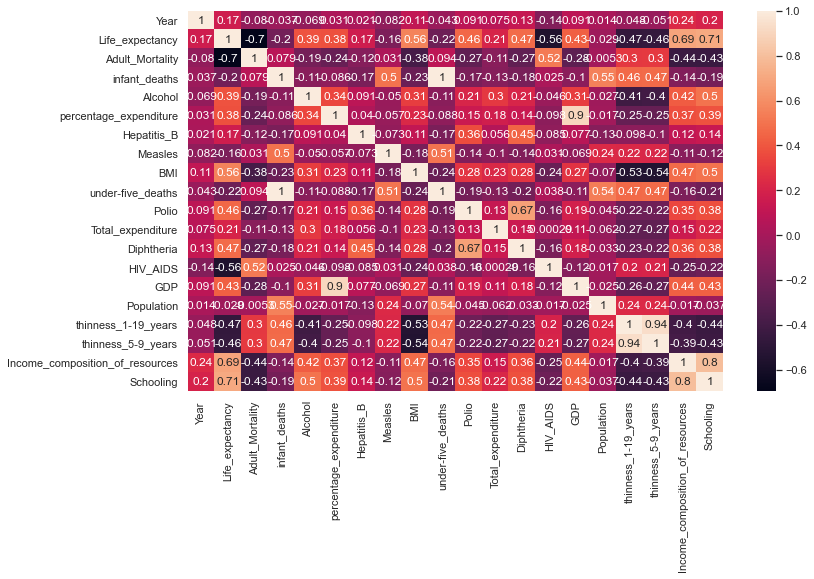

In [26]:
sns.heatmap(corrmatrix, annot = True)
plt.show()

In [27]:
#num_col = data.select_dtypes(exclude = ['object']).columns
#data_num = data[num_col]

In [28]:
for col in data_num:
    print(col)
    print(np.corrcoef(data_num[col], data_num['Life_expectancy']))
    print('')

Year
[[1.         0.17081927]
 [0.17081927 1.        ]]

Life_expectancy
[[1. 1.]
 [1. 1.]]

Adult_Mortality
[[ 1.         -0.69639007]
 [-0.69639007  1.        ]]

infant_deaths
[[ 1.         -0.19676906]
 [-0.19676906  1.        ]]

Alcohol
[[1.         0.38891754]
 [0.38891754 1.        ]]

percentage_expenditure
[[1.        0.3814181]
 [0.3814181 1.       ]]

Hepatitis_B
[[1.         0.17021864]
 [0.17021864 1.        ]]

Measles
[[ 1.         -0.15776659]
 [-0.15776659  1.        ]]

BMI
[[1.         0.55690117]
 [0.55690117 1.        ]]

under-five_deaths
[[ 1.         -0.22273822]
 [-0.22273822  1.        ]]

Polio
[[1.         0.45839934]
 [0.45839934 1.        ]]

Total_expenditure
[[1.         0.20884367]
 [0.20884367 1.        ]]

Diphtheria
[[1.         0.47221082]
 [0.47221082 1.        ]]

HIV_AIDS
[[ 1.         -0.55670342]
 [-0.55670342  1.        ]]

GDP
[[1.        0.4304613]
 [0.4304613 1.       ]]

Population
[[ 1.         -0.02901388]
 [-0.02901388  1.        ]]

t

**As per Statistical test Year, infant_deaths, Alcohol, percentage_expenditure, Hepatitis_B, Measles, under-five_deaths, Polio, Total_expenditure, Diphtheria, GDP, Population, thinness_1-19_years and thinness_5-9_years are NOT A GOOD PREDICTOR**

# 

# 

# Checking for null values

In [29]:
data_cat.isnull().sum()

Country    0
Status     0
dtype: int64

# Value counts of object variables

In [30]:
for col in data_cat:
    vc = data_cat[col].value_counts()
    print(col)
    print(pd.DataFrame({'Counts' : vc}))
    print('')

Country
                                       Counts
Angola                                 16    
Cambodia                               16    
Canada                                 16    
Democratic People's Republic of Korea  16    
Kazakhstan                             16    
...                                    ..    
Monaco                                 1     
San Marino                             1     
Dominica                               1     
Saint Kitts and Nevis                  1     
Nauru                                  1     

[193 rows x 1 columns]

Status
            Counts
Developing  2426  
Developed   512   



# Visualising the object variables

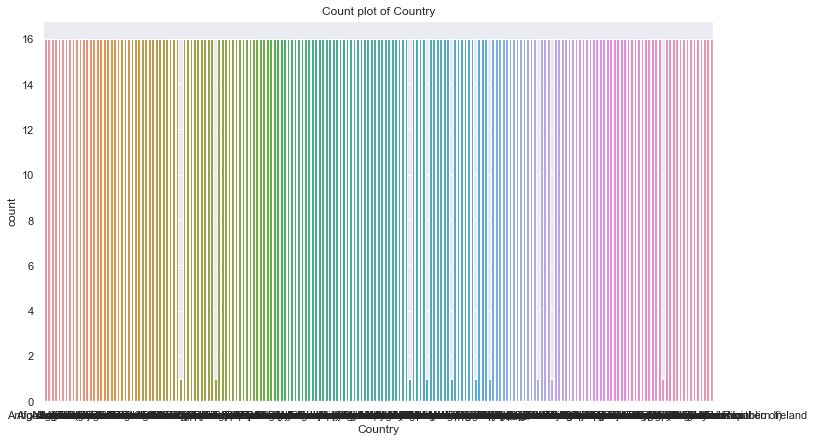

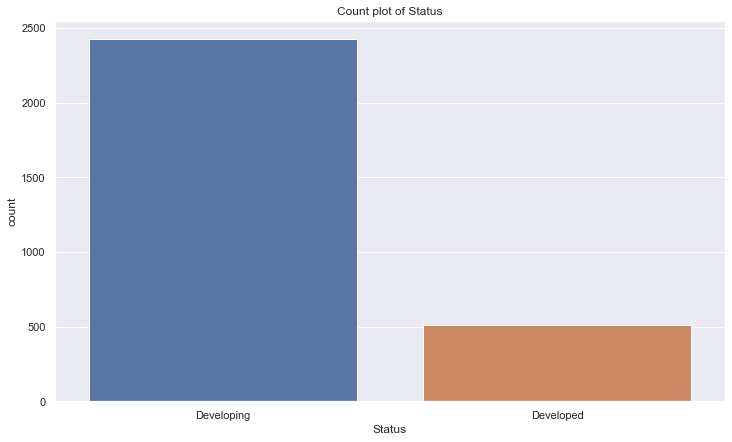

In [31]:
for col in data_cat:
    sns.countplot(data_cat[col])
    plt.xlabel(col)
    plt.ylabel('count')
    plt.title('Count plot of {}'.format(col))
    plt.show()
    print('')

In [32]:
data_cat['Life_expectancy'] = data['Life_expectancy']

In [33]:
for col in data_cat.columns[:-1]:
    if data_cat[col].value_counts().count() == 2:
        data_cat_1 = data_cat[data_cat[col] == 'Developed']
        data_cat_2 = data_cat[data_cat[col] == 'Developing']
        print(scipy.stats.ttest_ind(data_cat_1['Life_expectancy'], data_cat_2['Life_expectancy']))
        print('')
        print('')
        
    else:
        mod = ols('Life_expectancy ~ {}'.format(col), data = data_cat).fit()
        aov = sm.stats.anova_lm(mod, type = 2)
        print(aov)
        print('')
        print('')

                df      sum_sq   mean_sq        F  PR(>F)
Country  192.0000  244963.2267 1275.8501 181.6052 0.0000 
Residual 2745.0000 19284.7325  7.0254    NaN      NaN    


Ttest_indResult(statistic=29.826058104938262, pvalue=5.601005071227086e-171)




**As per value counts Country variable have almost unique for every record**

**So, it's a NOT A GOOD PREDICTOR**

# 

# Model building

In [34]:
data = data.drop(['Country', 'Year', 'infant_deaths', 'Alcohol', 'percentage_expenditure', 'Hepatitis_B', 'Measles', 'under-five_deaths', 'Polio', 'Total_expenditure', 'Diphtheria', 'GDP', 'Population', 'thinness_1-19_years', 'thinness_5-9_years'], axis = 1)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2938 non-null   object 
 1   Life_expectancy                  2938 non-null   float64
 2   Adult_Mortality                  2938 non-null   float64
 3   BMI                              2938 non-null   float64
 4   HIV_AIDS                         2938 non-null   float64
 5   Income_composition_of_resources  2938 non-null   float64
 6   Schooling                        2938 non-null   float64
dtypes: float64(6), object(1)
memory usage: 160.8+ KB


In [36]:
x = data.drop(['Life_expectancy'], axis = 1)
y = data['Life_expectancy']

In [37]:
x.shape

(2938, 6)

In [38]:
y.shape

(2938,)

# 

# Train Test

In [39]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = .20, random_state = 0)

# 

In [40]:
train = xtrain.join(ytrain)

In [41]:
train.shape

(2350, 7)

In [42]:
test = xtest.join(ytest)

In [43]:
test.shape

(588, 7)

# 

# 

# OLS Model With Good predictor

In [44]:
model_1 = smf.ols(formula = 'Life_expectancy ~ Status + Adult_Mortality + BMI + HIV_AIDS + Income_composition_of_resources + Schooling',data = train).fit()
print(model_1.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     1744.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:51:51   Log-Likelihood:                -6624.1
No. Observations:                2350   AIC:                         1.326e+04
Df Residuals:                    2343   BIC:                         1.330e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# 

# VIF

In [45]:
x_num = x.drop('Status', axis = 1)

In [46]:
vif_trn = pd.DataFrame()
vif_trn["feature"] = x_num.columns

In [47]:
# calculating VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_trn["VIF"] = [variance_inflation_factor(x_num.values, i) for i in range(len(x_num.columns))]
  
print(vif_trn)

                           feature     VIF
0  Adult_Mortality                 4.1251 
1  BMI                             6.8593 
2  HIV_AIDS                        2.6356 
3  Income_composition_of_resources 33.9953
4  Schooling                       39.2875


# 

# Model for VIF<10

In [48]:
model_2 = smf.ols(formula = 'Life_expectancy ~ Status + Adult_Mortality + BMI + HIV_AIDS + Income_composition_of_resources',data = train).fit()
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:        Life_expectancy   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     1987.
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        15:51:51   Log-Likelihood:                -6674.2
No. Observations:                2350   AIC:                         1.336e+04
Df Residuals:                    2344   BIC:                         1.339e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

# 

# 

In [49]:
x = x.drop('Schooling', axis = 1)

In [50]:
xtest = xtest.drop('Schooling', axis = 1)

In [51]:
# these are predicted values, called y hat also

predict = model_2.predict(test)
predict

867    75.8614
1780   67.6495
621    52.2712
2715   60.0883
2717   54.4025
         ...  
1290   80.1124
2724   51.6881
392    74.5552
27     75.0412
674    80.1640
Length: 588, dtype: float64

In [52]:
# Residuals = Actual(y)  - Predictor(y hat)

residuals = test.Life_expectancy - predict
residuals

867    1.4386 
1780   -1.0495
621    0.3288 
2715   1.4117 
2717   5.5975 
        ...   
1290   1.1876 
2724   1.5119 
392    -1.9552
27     -2.0412
674    2.8360 
Length: 588, dtype: float64

In [53]:
# Now We have a new column in our data

test['predict'] = predict

In [54]:
# Now We have an another new column in our data

test['residuals'] = residuals

In [55]:
# Now We Create Observation Number

obs = np.arange(2073) 
obs 

obsno = pd.DataFrame(obs) # convert array into a data frame 

test['obsno'] = obsno # craete a new variable/column 'obsno' in yr data

In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 588 entries, 867 to 674
Data columns (total 10 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           588 non-null    object 
 1   Adult_Mortality                  588 non-null    float64
 2   BMI                              588 non-null    float64
 3   HIV_AIDS                         588 non-null    float64
 4   Income_composition_of_resources  588 non-null    float64
 5   Schooling                        588 non-null    float64
 6   Life_expectancy                  588 non-null    float64
 7   predict                          588 non-null    float64
 8   residuals                        588 non-null    float64
 9   obsno                            416 non-null    float64
dtypes: float64(9), object(1)
memory usage: 66.7+ KB


# 

# 1_Normality

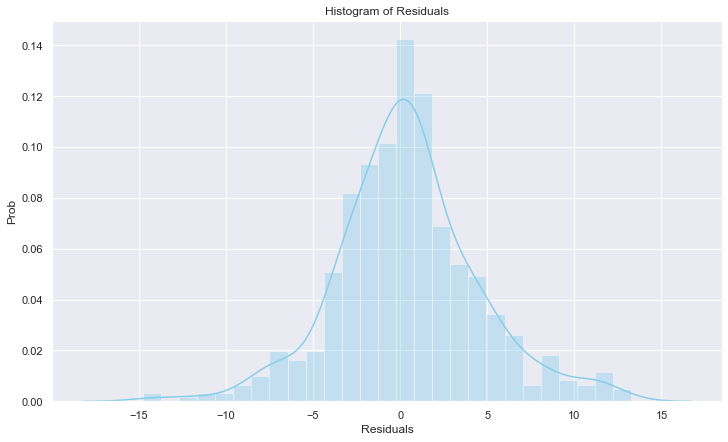

In [57]:
sns.distplot(test.residuals, color='skyblue')
plt.title('Histogram of Residuals')
plt.ylabel('Prob')
plt.xlabel('Residuals')
plt.show()

# 

# 2_Linearity

In [58]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2350 entries, 683 to 2732
Data columns (total 7 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Status                           2350 non-null   object 
 1   Adult_Mortality                  2350 non-null   float64
 2   BMI                              2350 non-null   float64
 3   HIV_AIDS                         2350 non-null   float64
 4   Income_composition_of_resources  2350 non-null   float64
 5   Schooling                        2350 non-null   float64
 6   Life_expectancy                  2350 non-null   float64
dtypes: float64(6), object(1)
memory usage: 211.4+ KB


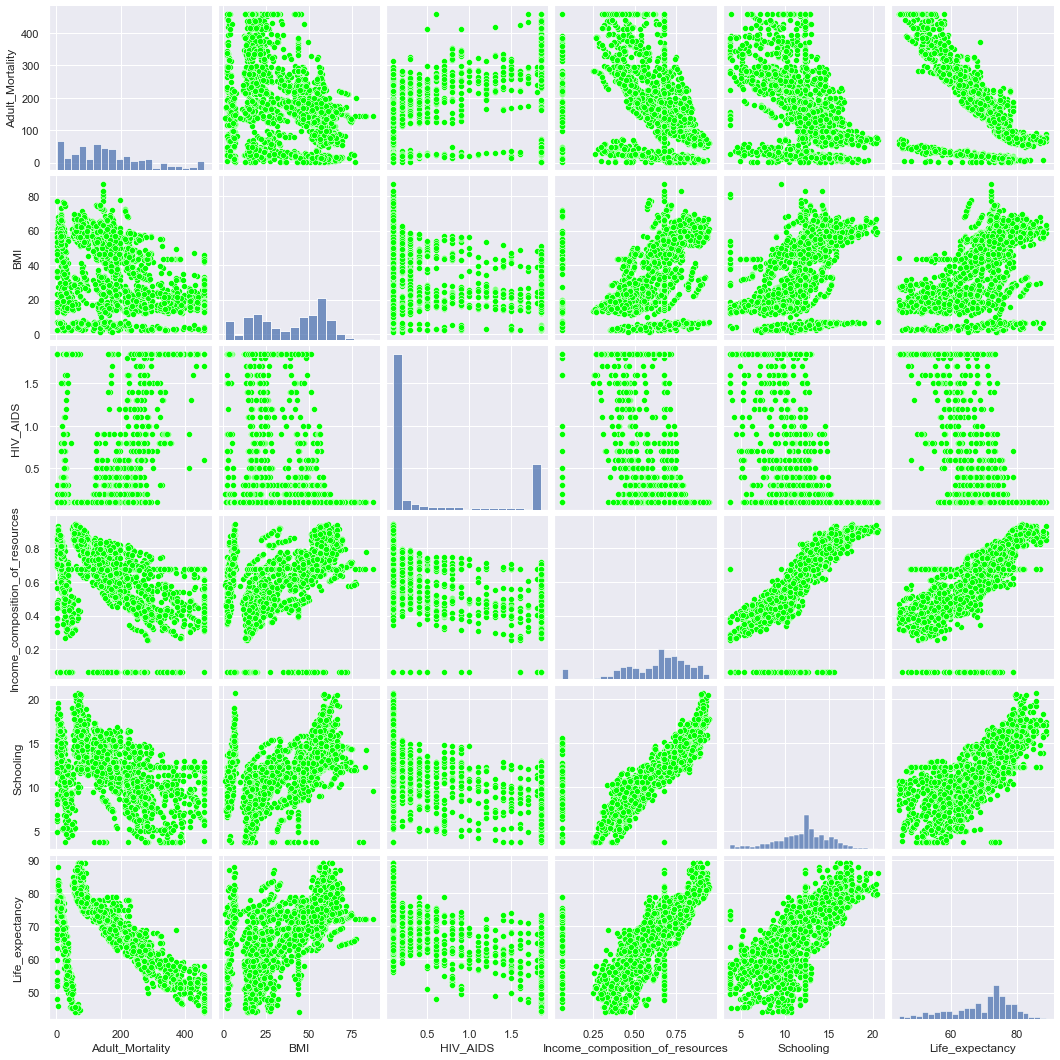

In [59]:
sns.pairplot(train ,palette = sns.color_palette('Set3_r'), markers = ['>'], plot_kws = {'facecolors':'#00FF00'})

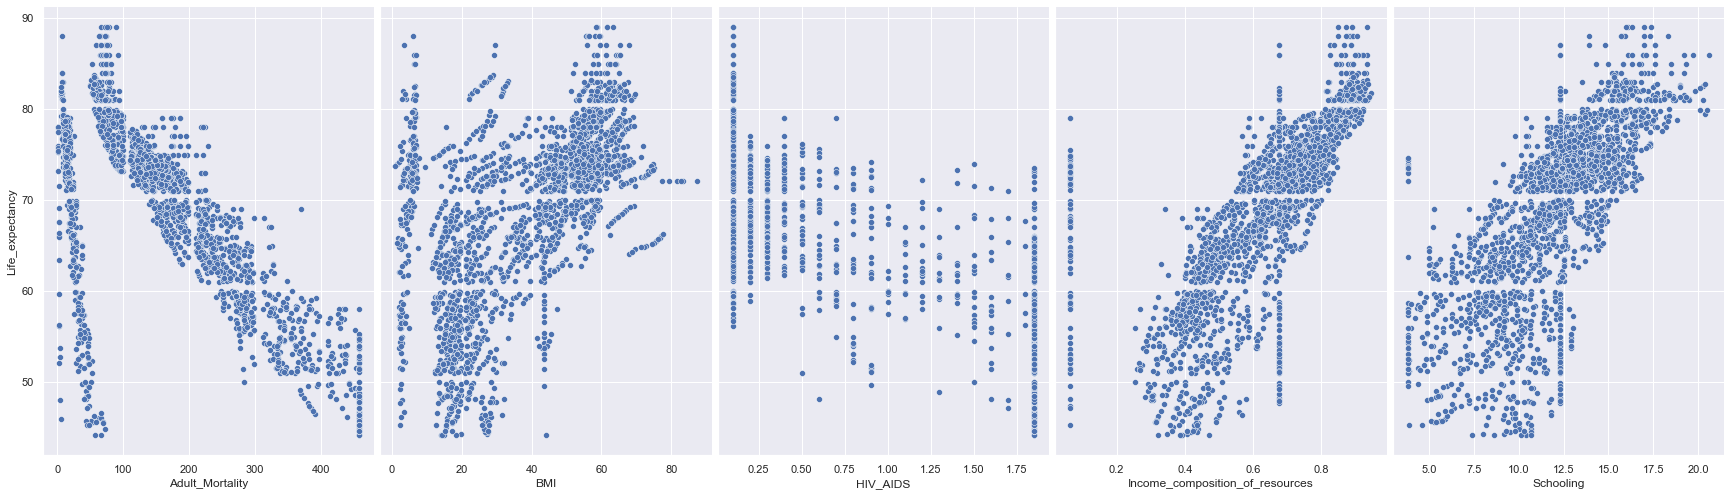

In [60]:
# visualize the relationship between the features and the response using scatterplots

sns.pairplot(train, x_vars = ['Adult_Mortality', 'BMI', 'HIV_AIDS',
       'Income_composition_of_resources', 'Schooling'],
             y_vars = 'Life_expectancy', size=7, aspect=0.7)

# 

# 3_Independence of observation

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

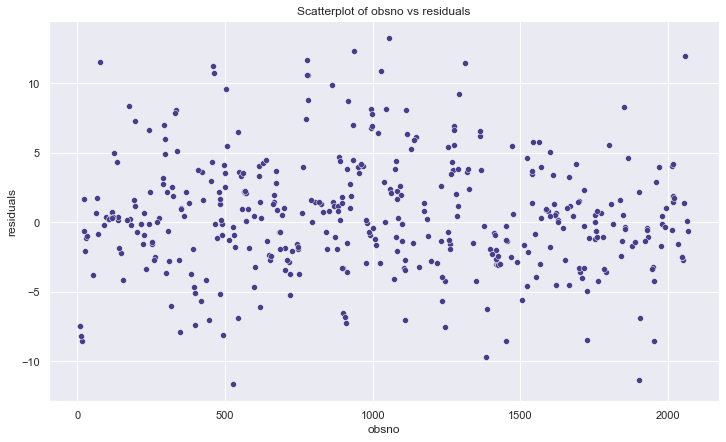

In [61]:
sns.scatterplot(x = test.obsno, y = test.residuals, palette='spring_r', color='darkslateblue', markers='+')
plt.title('Scatterplot of obsno vs residuals')

# 

# 4_Constant Error Variance [Heteroscedasticity]

Text(0.5, 1.0, 'Scatterplot of predict vs residuals')

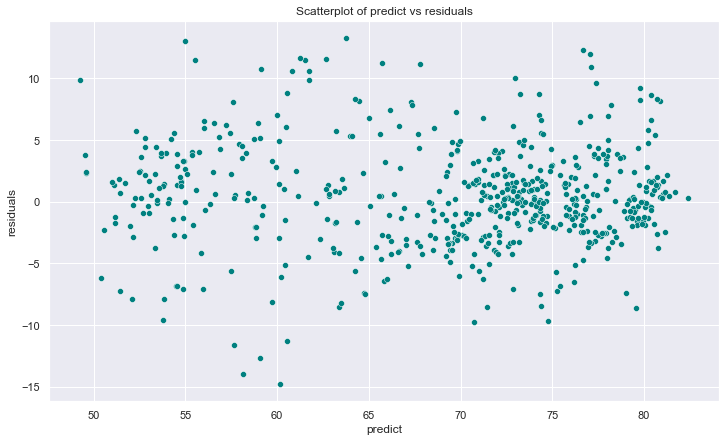

In [62]:
sns.scatterplot(x = test.predict, y = test.residuals, palette='spring', color='teal')
plt.title('Scatterplot of predict vs residuals')

# 

# 5_VIF

In [63]:
x = train.drop(['Status', 'Life_expectancy', 'Schooling'], axis = 1)

In [64]:
x.columns

Index(['Adult_Mortality', 'BMI', 'HIV_AIDS',
       'Income_composition_of_resources'],
      dtype='object')

In [65]:
vif_trn = pd.DataFrame()
vif_trn["feature"] = x.columns

In [66]:
# calculating VIF for each feature

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_trn["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
  
print(vif_trn)

                           feature    VIF
0  Adult_Mortality                 4.0151
1  BMI                             6.3499
2  HIV_AIDS                        2.6554
3  Income_composition_of_resources 7.5630


# 

# 6_Durbin Watson

In [67]:
# import numpy and statsmodels for durbin watson

import numpy as np
from statsmodels.stats.stattools import durbin_watson

gfg = durbin_watson(model_2.resid)


print("Durbin Watson Value :", round(gfg, 3))

Durbin Watson Value : 1.99


# 

# 

# RMSE : the final vedict!

In [68]:
se_1 = residuals.pow(2)
se_1

867    2.0695 
1780   1.1015 
621    0.1081 
2715   1.9930 
2717   31.3317
         ...  
1290   1.4103 
2724   2.2859 
392    3.8228 
27     4.1666 
674    8.0430 
Length: 588, dtype: float64

In [69]:
sse_1 = se_1.sum()
sse_1

10065.259443689809

In [70]:
msse_1 = sse_1/len(se_1)
msse_1

17.117788169540493

In [71]:
import math

math.sqrt(msse_1)

4.137364882330357

# 

# Plot

# 

In [72]:
xtrain1 = xtrain.drop('Schooling', axis = 1)
#xtest = xtest.drop('Schooling', axis = 1)

In [73]:
xtrain1

,Status,Adult_Mortality,BMI,HIV_AIDS,Income_composition_of_resources
683,Developed,65.0000,55.3000,0.1000,0.8260
478,Developing,273.0000,12.4000,1.8500,0.4120
2359,Developed,124.0000,51.8000,0.1000,0.8240
971,Developing,288.0000,21.5000,1.8500,0.4150
880,Developing,225.0000,54.3000,0.1000,0.7810
...,...,...,...,...,...
763,Developing,318.0000,3.2000,1.8500,0.3960
835,Developing,32.0000,24.0000,1.8500,0.5820
1653,Developing,28.0000,29.4000,1.1000,0.5010
2607,Developing,165.0000,15.1000,0.1000,0.5990


In [74]:
xtrain1.Status.value_counts()

Developing    1955
Developed     395 
Name: Status, dtype: int64

In [75]:
xtrain1.Status.replace('Developed', 0, inplace = True)
xtrain1.Status.replace('Developing', 1, inplace = True)
xtest.Status.replace('Developed', 0, inplace = True)
xtest.Status.replace('Developing', 1, inplace = True)

In [76]:
xtrain1.shape

(2350, 5)

In [77]:
xtest.shape

(588, 5)

# 

In [78]:
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain1)
xtest = sc_x.transform(xtest)

# 

In [79]:
sgdr=SGDRegressor()
sgdr.fit(xtrain, ytrain)

SGDRegressor()

In [80]:
score = sgdr.score(xtrain, ytrain)
print('R-square : ', score)

R-square :  0.8090219583983582


In [81]:
y_pred = sgdr.predict(xtest)

In [82]:
mse = mean_squared_error(ytest, y_pred)
print('MSE : ', mse)
print('RMSE : ', np.sqrt(mse))

MSE :  17.113916963982245
RMSE :  4.136897021196231


# 

In [83]:
sgdr.coef_

array([-1.18132144, -2.12071858,  0.97869254, -4.20206282,  2.49683975])

In [84]:
sgdr.intercept_

array([69.14829693])